# **Milestone 1**

## **Context**
 - Why is this problem important to solve?

### **The objectives:**

 - What is the intended goal?

###**The key questions:**

- What are the key questions that need to be answered?



###**The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [44]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [45]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [46]:
# View first 5 rows
data.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74

In [47]:
# View last 5 rows Hint: Use tail() method
data.tail()

S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine  Power  Seats  New_price  Price  
7248  1598.0  103.6    5.0        NaN    NaN  
7249  1197.0  103.6    5.0        NaN    NaN  
7250  1461.0   63.1    5.0        NaN    NaN  
7251  1197.0  103.6    5.0        NaN    NaN  
7252  2148.0  170.0    5.0        NaN    NaN

#### **Observations and Insights: _____**
- There are some missing data. We should find/explore them and decide how to treat those missing data.
- We should check to make sure Sr.No is unique and probably removed for analysis since it is unique and does not affect the model outcome.
- We probably have to divide the Name column into two different columns since it includes two different set of information.
- There are some numeric and some are objects. Some can be analized based on categorical data, some as numerical. We should explore this more.
- The dataset is probably sorted by their Serial Numbers.


### **Let us check the data types and and missing values of each column** 

In [48]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [49]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights: _____** 
- There are 7253 Serial Numbers (meaning cars).
- There are total 14 columns
- We do not have empty value in SN, Name, Location, Year, Km driven, Fuel Type, Transmission, and Owner_Type
- There are emty values in (2), Engine(46), Power(175), Seats(53), New_Price(6247), and Price (1234)
- We have 6 Float columns and 2 integers, and 5 objects
- Seats has only 53 missing values, therefore, number of seats can be one of key features in our prediction.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [50]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = ["S.No."], inplace = True)
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  
0        NaN   1.75  
1        NaN  12.50  
2       8.61   4.50  
3        NaN   6.00  
4        NaN  17.74

In [51]:
#Here, we would like to add another feature, "Age" based on the year of the car built
data['Current_year']=2022
data['Ageofcar']=data['Current_year']-data['Year']
data.drop('Current_year',axis=1,inplace=True)
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  Ageofcar  
0        NaN   1.75        11  
1        NaN  12.50         6  
2       8.61   4.50        10  
3        NaN   6.00         9  
4        NaN  17.74         8

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [52]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

count          mean           std      min        25%  \
Year               7253.0   2013.365366      3.254421  1996.00   2011.000   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.000   
Mileage            7251.0     18.141580      4.562197     0.00     15.170   
Engine             7207.0   1616.573470    595.285137    72.00   1198.000   
Power              7078.0    112.765214     53.493553    34.20     75.000   
Seats              7200.0      5.280417      0.809277     2.00      5.000   
New_price          1006.0     22.779692     27.759344     3.91      7.885   
Price              6019.0      9.479468     11.187917     0.44      3.500   
Ageofcar           7253.0      7.634634      3.254421     2.00      5.000   

                        50%         75%         max  
Year                2014.00   2016.0000     2019.00  
Kilometers_Driven  53416.00  73000.0000  6500000.00  
Mileage               18.16     21.1000       33.54  
Engine              1493.00   1968.0000     5998.00  
Power                 94.00    138.1000      616.00  
Seats                  5.00      5.0000       10.00  
New_price             11.57     26.0425      375.00  
Price                  5.64      9.9500      160.00  
Ageofcar               7.00     10.0000       25.00

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Ageofcar           7253 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


#### **Observations and Insights: _____**
- The cars were nuilt between 1996 and 2019. Age of cars 2 year old to 25 years old
- 75% of the cars were built upto 2016, 50% were built upto 2014 and 25% were built upto 2014
- The average km driven is ~58K, where minimum is 171 and max is 6.5 mil which possibly is a wrong value and later on we need to treat this )we can probably remo eit from our analysis)
- 75% of tje cars were driven upto 73K
- The Mileage average is ~18 where min is 0 and max is 33.54 and 75% of the data are upto 21. Mileage cannot be 0. We have to check that later and remove if needed.
- The engine Averahe is ~1616 and min is 72 and max is 5998 and 75% falls upto 1968
- Power average is 112, min is 34.20and maz is 616 wjere 75% of the data has upto 138 power
- Min seat is 2, max is 10 and 75% of the data has uptp 5 seats 
- New price min is 3.91 and max is 375 where 75% of the cars has a price of upto 26, and the average is 22.7
- Min price is 0.44 and max is 160, where average is 9.4 and 75% of the cars are uptp 9.95.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [54]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
data.describe(include='object')

Name Location Fuel_Type Transmission Owner_Type
count                     7253     7253      7253         7253       7253
unique                    2041       11         5            2          4
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First
freq                        55      949      3852         5204       5952

**Number of unique observations in each category**

In [55]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts())
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights: _____**
- Thid is only number of unique values, we can also add (normalize = True) to the code to check the percentage of the values which makes more sense, but since the question did not ask this, I have not included that part.
- in the columns Name, we see that some names have been in the data for one time and some are more than one time.
- In the column location we can see that Mumbai has a very high number 949 cars and descending where Ahmedabad has 275.
- Fuel type is mostly Diesle with 3852 and petrol with 3325 and only 2 electric cars. CNG and LPG are also very small.
- transmission is more manual 5204 and only 2049 automatic.
- Owner type is mostly Fiesr 5952 and second is 4452, third is 137 and fourth and above is only 12
- The count of all these objects/features are 7253.
- There are 204 unique car names, 11 locations, 5 Fuel Types, 2 Transmission and 4 Owner Types.
- The top Name is Mahindra XUV500 W8 2WD, and the top location is Mumbai, the top Fuel type is Diesel, and the top transmission is Manualand the top pwner type is First.
- The abovementione dtops has a frequency of 55 for the top name, 949 for the top location, 3853 for the top Fuel Type, 5204 for the top Tranmission, 5952 for thr top Owner Type.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [56]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

Name   Location  Year  \
2328                        BMW X5 xDrive 30d M Sport    Chennai  2017   
340            Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline    Chennai  2013   
358                             Hyundai i10 Magna 1.2    Chennai  2009   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015   
3092                             Honda City i VTEC SV    Kolkata  2015   
4491                   Hyundai i20 Magna Optional 1.2  Bangalore  2013   
6921                      Maruti Swift Dzire Tour LDI     Jaipur  2012   
3649                                   Tata Indigo LS     Jaipur  2008   
1528      Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  Hyderabad  2005   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2328            6500000    Diesel    Automatic      First    15.97  2993.0   
340              775000    Diesel    Automatic      First    19.30  1968.0   
1860             720000    Diesel       Manual      First    20.54  1598.0   
358              620000    Petrol       Manual      First    20.36  1197.0   
2823             480000    Diesel    Automatic      First    16.96  1968.0   
3092             480000    Petrol       Manual      First    17.40  1497.0   
4491             445000    Petrol       Manual      First    18.50  1197.0   
6921             350000    Diesel       Manual      First    23.40  1248.0   
3649             300000    Diesel       Manual      First    17.00  1405.0   
1528             299322    Diesel       Manual      First    12.80  2494.0   

       Power  Seats  New_price  Price  Ageofcar  
2328  258.00    5.0        NaN  65.00         4  
340   141.00    5.0        NaN   7.50         8  
1860  103.60    5.0        NaN   5.90         8  
358    78.90    5.0        NaN   2.70        12  
2823  138.03    5.0        NaN  13.00         6  
3092  117.30    5.0        NaN   5.00         6  
4491   82.90    5.0        NaN   4.45         8  
6921   74.00    5.0        NaN    NaN         9  
3649   70.00    5.0        NaN   1.00        13  
1528  102.00    8.0        NaN   4.00        16

#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [57]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop([2328], axis=0,inplace=True )

**Check Mileage extreme values**

In [58]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

Name    Location  Year  \
2597                Hyundai Santro Xing XP        Pune  2007   
2343                     Hyundai Santro AT   Hyderabad  2006   
5270                    Honda City 1.5 GXI   Bangalore  2002   
424   Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010   
6857        Land Rover Freelander 2 TD4 SE      Mumbai  2011   
443          Hyundai Santro GLS I - Euro I  Coimbatore  2012   
5119                Hyundai Santro Xing XP     Kolkata  2008   
5022        Land Rover Freelander 2 TD4 SE   Hyderabad  2013   
5016       Land Rover Freelander 2 TD4 HSE       Delhi  2013   
2542       Hyundai Santro GLS II - Euro II   Bangalore  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2597              70000    Petrol       Manual      First      0.0  1086.0   
2343              74483    Petrol    Automatic      First      0.0   999.0   
5270              53000    Petrol       Manual     Second      0.0     NaN   
424               42021    Diesel       Manual      First      0.0  1968.0   
6857              87000    Diesel    Automatic      First      0.0  2179.0   
443               50243    Petrol       Manual      First      0.0  1086.0   
5119              45500    Petrol       Manual     Second      0.0  1086.0   
5022              46000    Diesel    Automatic     Second      0.0  2179.0   
5016              72000    Diesel    Automatic      First      0.0  2179.0   
2542              65000    Petrol       Manual     Second      0.0     NaN   

      Power  Seats  New_price  Price  Ageofcar  
2597    NaN    5.0        NaN   1.12        14  
2343    NaN    5.0        NaN   2.30        15  
5270    NaN    NaN        NaN   1.85        19  
424     NaN    5.0        NaN   5.45        11  
6857  115.0    5.0        NaN    NaN        10  
443     NaN    5.0        NaN   3.35         9  
5119    NaN    5.0        NaN   1.17        13  
5022  115.0    5.0        NaN  26.00         8  
5016  115.0    5.0        NaN  15.50         8  
2542    NaN    NaN        NaN   3.15        10

#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

In [59]:
data.query("Mileage  == 0")['Mileage'].count()

81

In [60]:
# We have to change these 0 values to Null Value so we can treat them later:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan

In [61]:
data.query("Seats == 0")['Seats']

Series([], Name: Seats, dtype: float64)

In [62]:
# We can check the same for other features as well, starting with Power:
data.query("Power  == 0")['Power'].count()

0

In [63]:
#check 0 value for Engine:
data.query("Engine  == 0")['Engine'].count()

0

In [64]:
#And for Seats:
data.query("Seats  == 0")['Seats'].count()

0

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [65]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

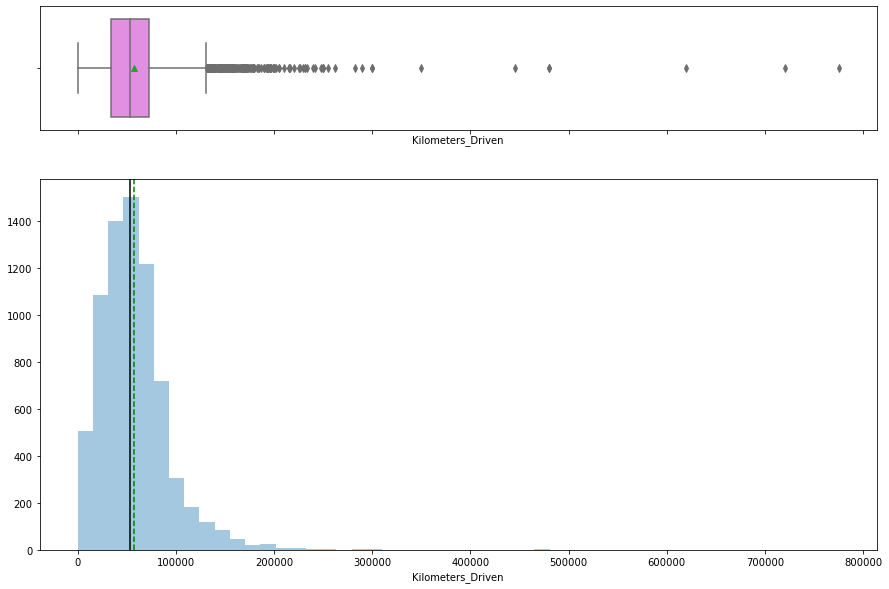

In [66]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

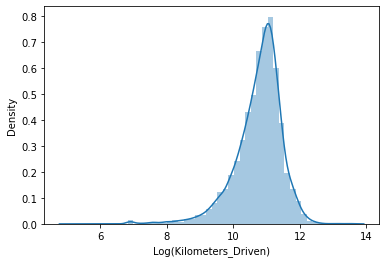

In [67]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights: _____**
- When we did a log transformation, the distibition is getting closer to normal distribution with a lower skewness. Therefore, this tells us if we want to do linear regression later on, we have this one already checked.
- Also from the box plot, we can see that there are quite a lot of outliers.

In [68]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

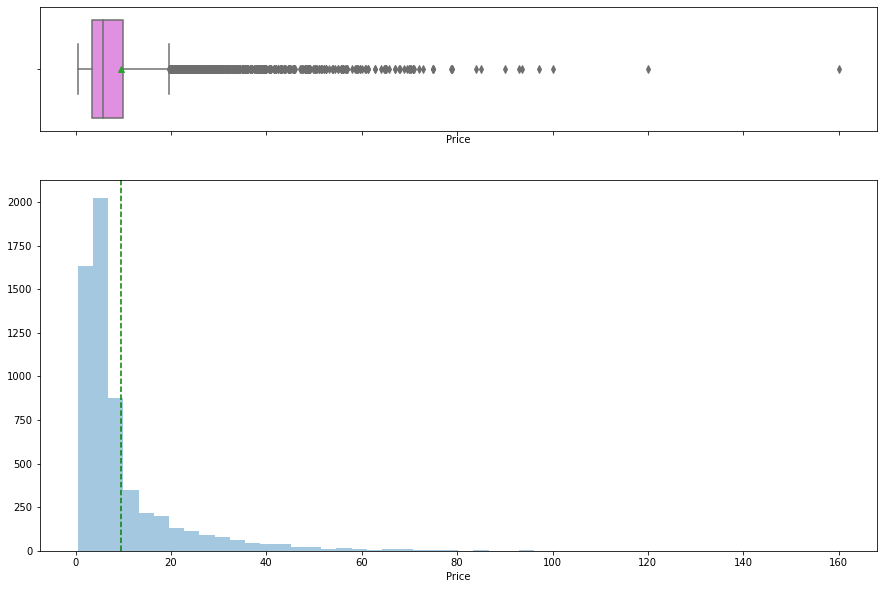

In [69]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

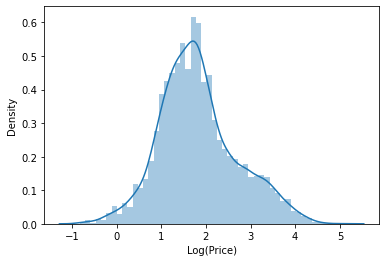

In [70]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [71]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

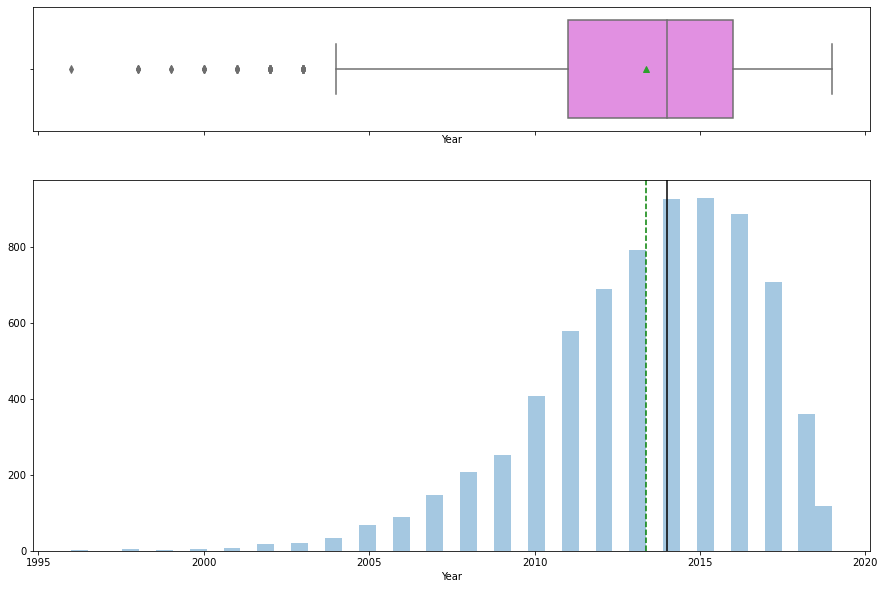

In [72]:
histogram_boxplot(data['Year'])

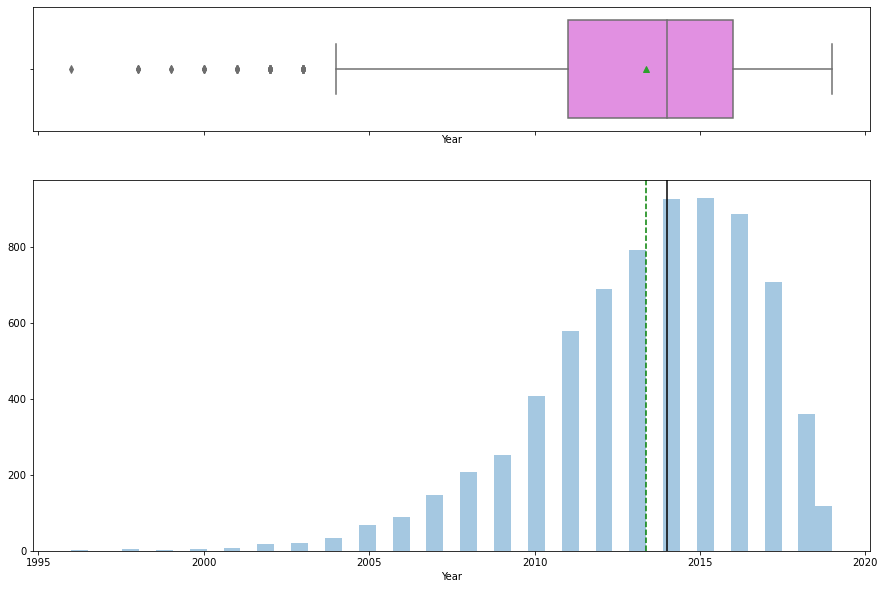

In [73]:
histogram_boxplot(data['Year'])

#### **Observations and Insights for all the plots: _____**
- Seat, Year and engine, can be treated as categorical data, not numerical since they have specific values only
- Power also needs a log transformation.
- Mileage seems to have a relatively normal distribution.
- New Price is right skewed as well.
- Engine is right skewed and has outliers on higher side.
- Power is also right skewed and high outliers.
- Price is also right skewed and has a lot of high outliers.

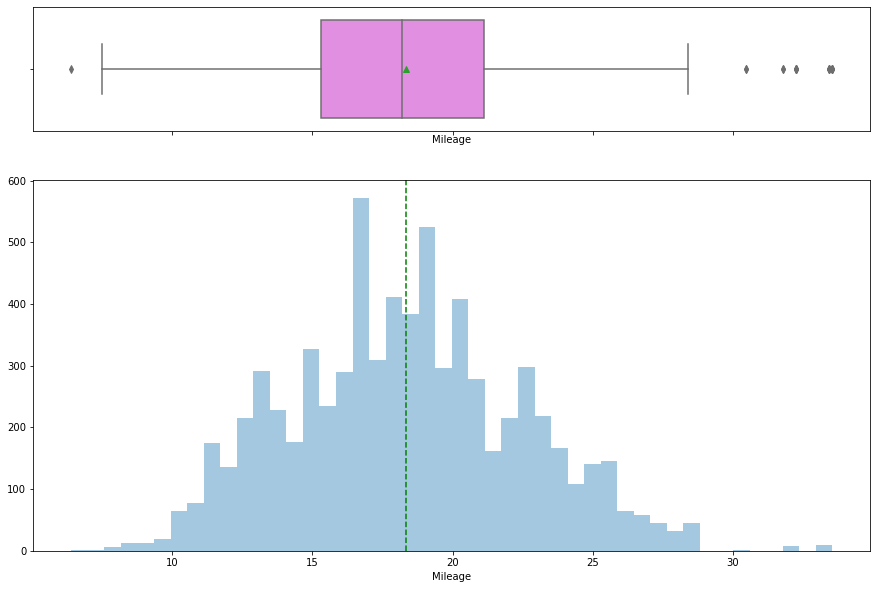

In [74]:
histogram_boxplot(data['Mileage'])

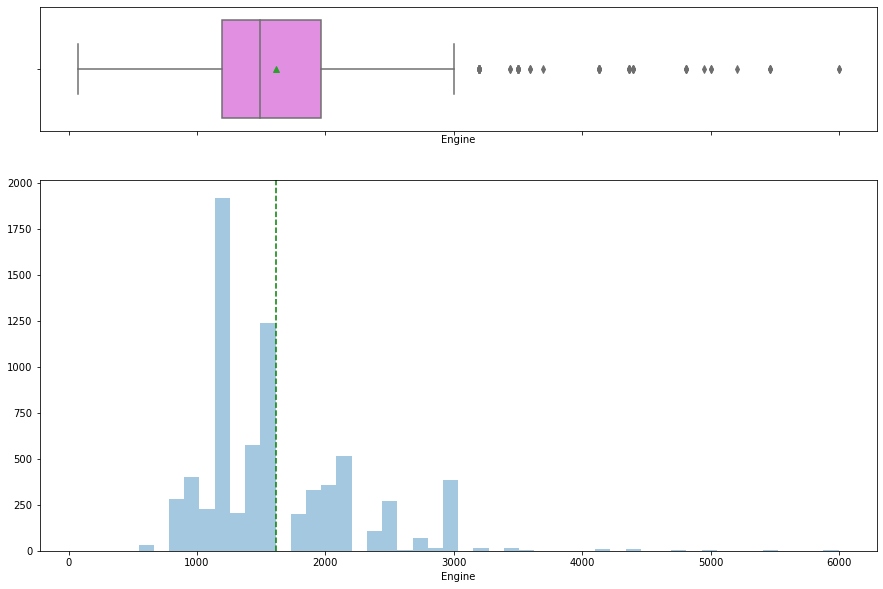

In [75]:
histogram_boxplot(data['Engine'])

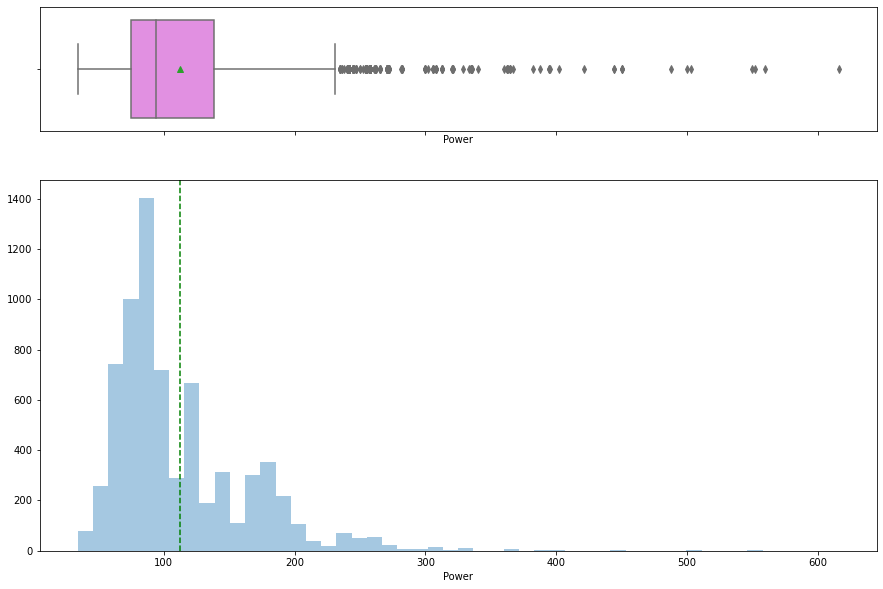

In [76]:
histogram_boxplot(data['Power'])

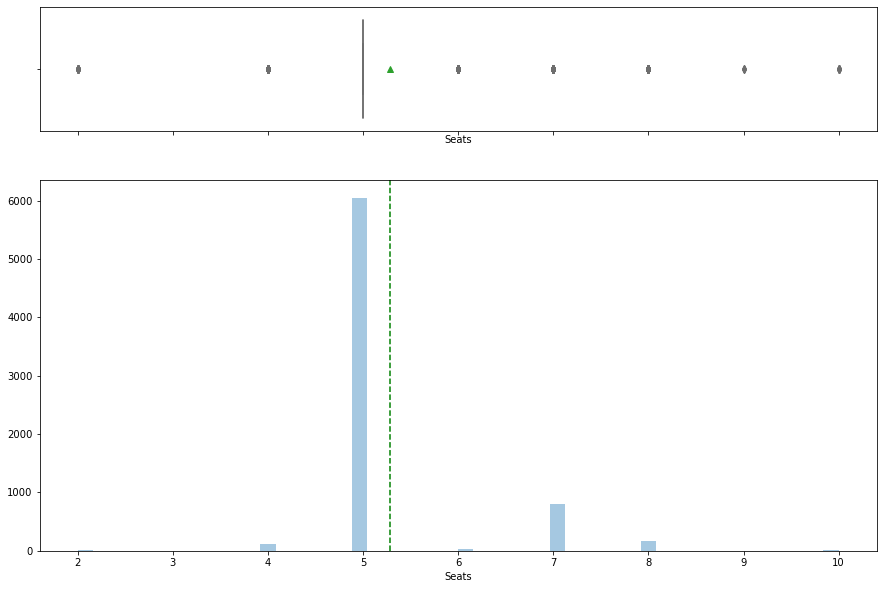

In [77]:
histogram_boxplot(data['Seats'])

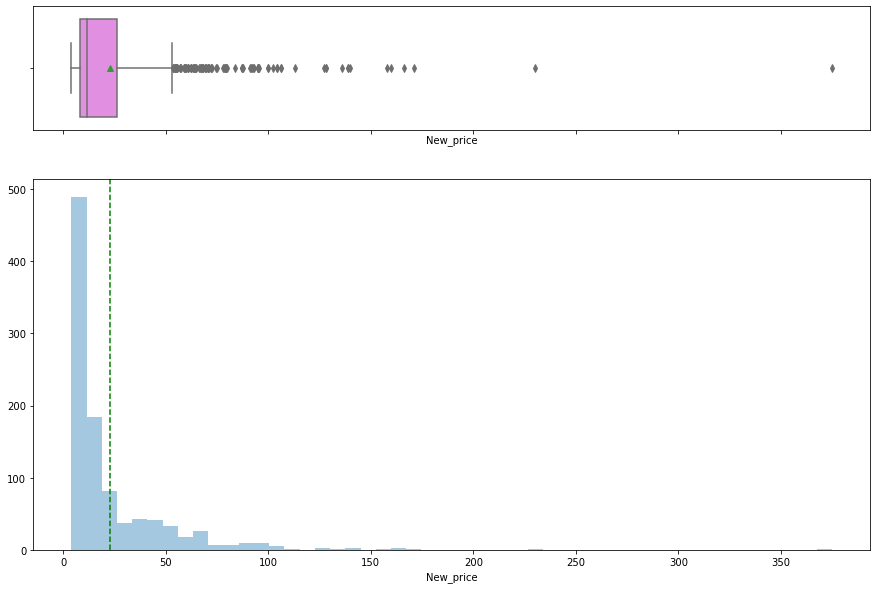

In [78]:
histogram_boxplot(data['New_price'])

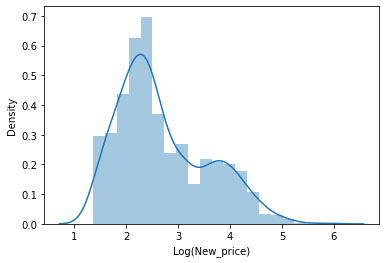

In [79]:
sns.distplot(np.log(data["New_price"]), axlabel="Log(New_price)");

## **2. Univariate analysis - Categorical Data**

In [80]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

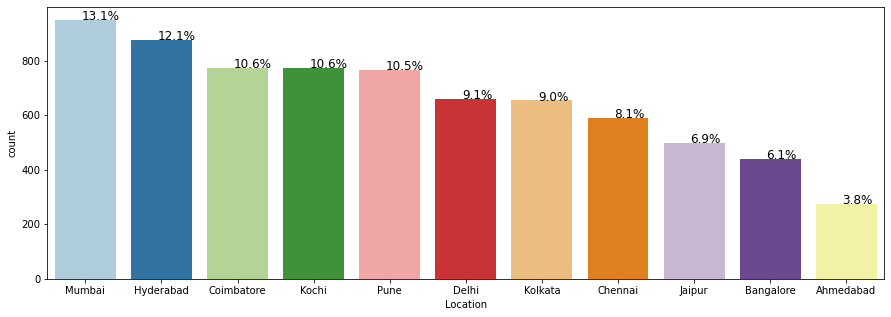

In [81]:
#Bar Plot for 'Location'
perc_on_bar('Location')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

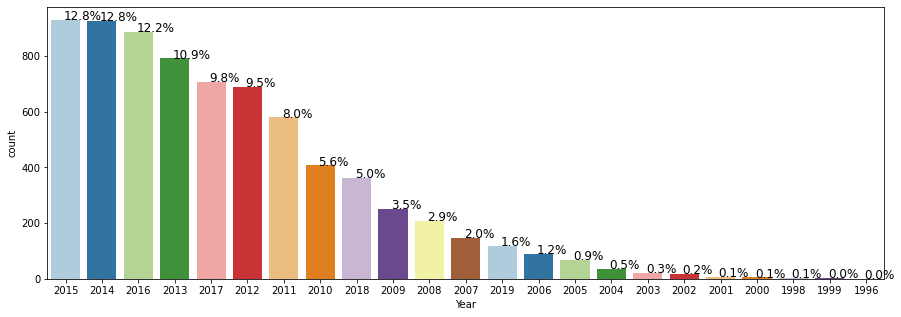

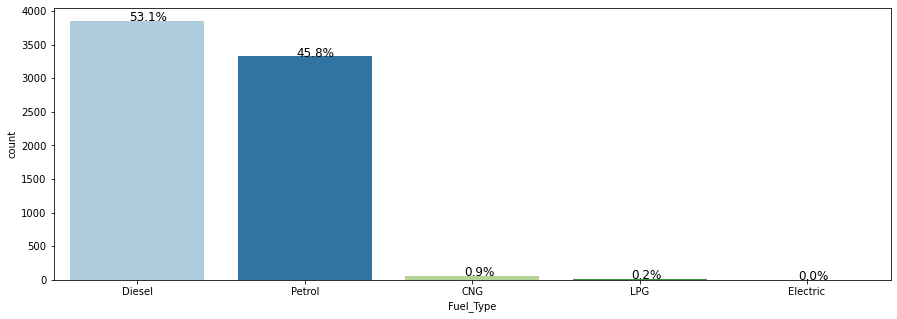

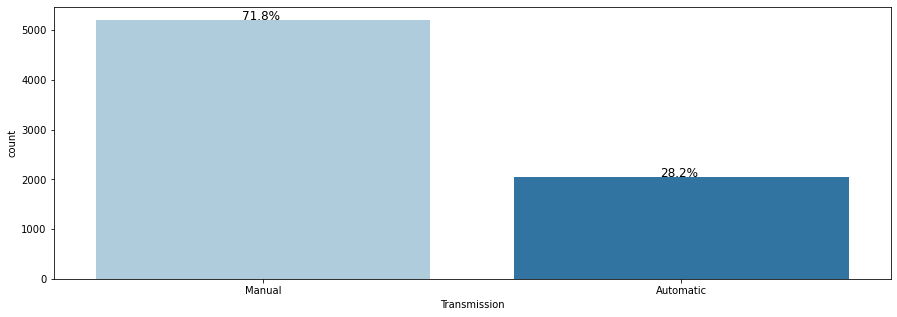

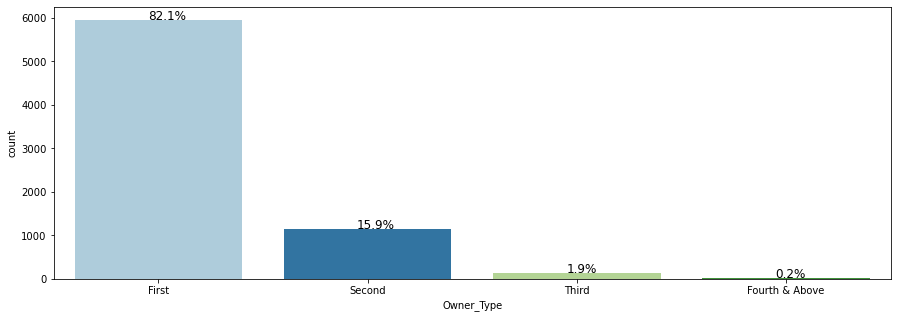

In [82]:
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')

#### **Observations and Insights from all plots: _____**
- This helps us understand univariate and percentage in each category
- Owner Type: This shows that First owners include majarity of the data 82% following second with 15.9% and third and fourth and above are very small percentages.
- Transmission: It is either Manual or Automatic and 71.8% are Manual.
- Fuel Type are 5 types, Diesl(53.1%) with higher percentage along with Petrol (45.8%), CNG (0.9%), LPG(0.2%), and very small Electric (smaller than 0.0% (Which we saw earlier only 2 of the cars were electric) 
- Year: This is almost linear (ALMOST). Except year 2019 and 2018 and 2017, and 2016, the rest of the data is linear and as the year increases, the number of the cars increases as well. The highest number of cars are for 2014 and 2015, and very few from 2000 and less than year 2000 which makes sense because those cars are obsolete now an dprobably cannot be found anymore.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='Year'>

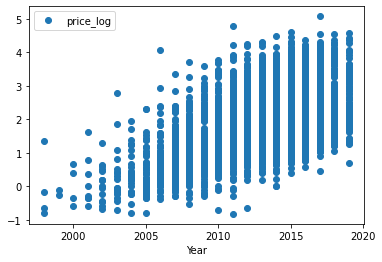

In [83]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='Year', y='price_log', style='o')

<AxesSubplot:xlabel='Power'>

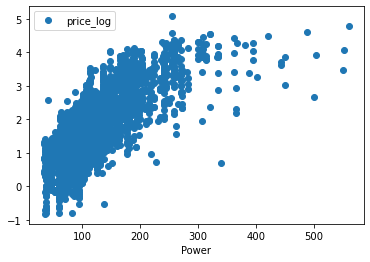

In [84]:
data.plot(x='Power', y='price_log', style='o')

<AxesSubplot:xlabel='Engine'>

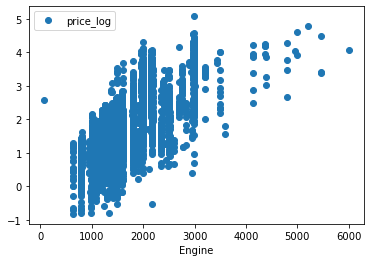

In [85]:
data.plot(x='Engine', y='price_log', style='o')

<AxesSubplot:xlabel='New_price'>

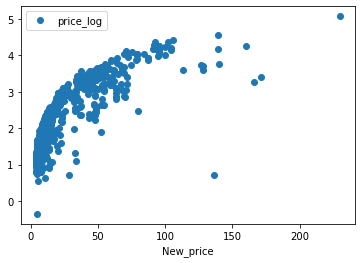

In [86]:
data.plot(x='New_price', y='price_log', style='o')

<AxesSubplot:xlabel='Ageofcar'>

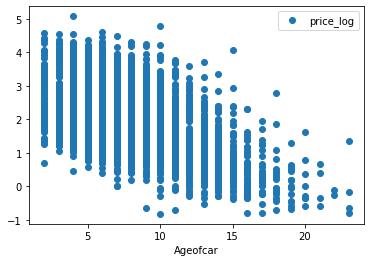

In [87]:
data.plot(x='Ageofcar', y='price_log', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

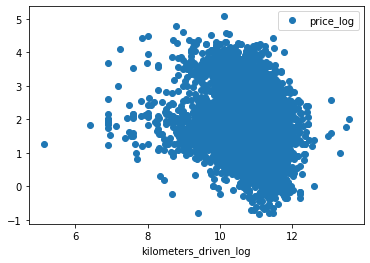

In [88]:
data.plot(x='kilometers_driven_log', y='price_log', style='o')

<AxesSubplot:xlabel='Mileage'>

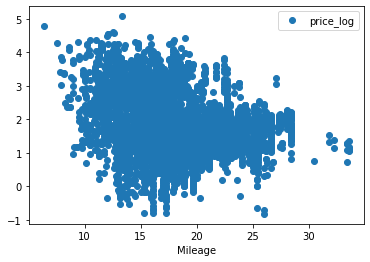

In [89]:
data.plot(x='Mileage', y='price_log', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

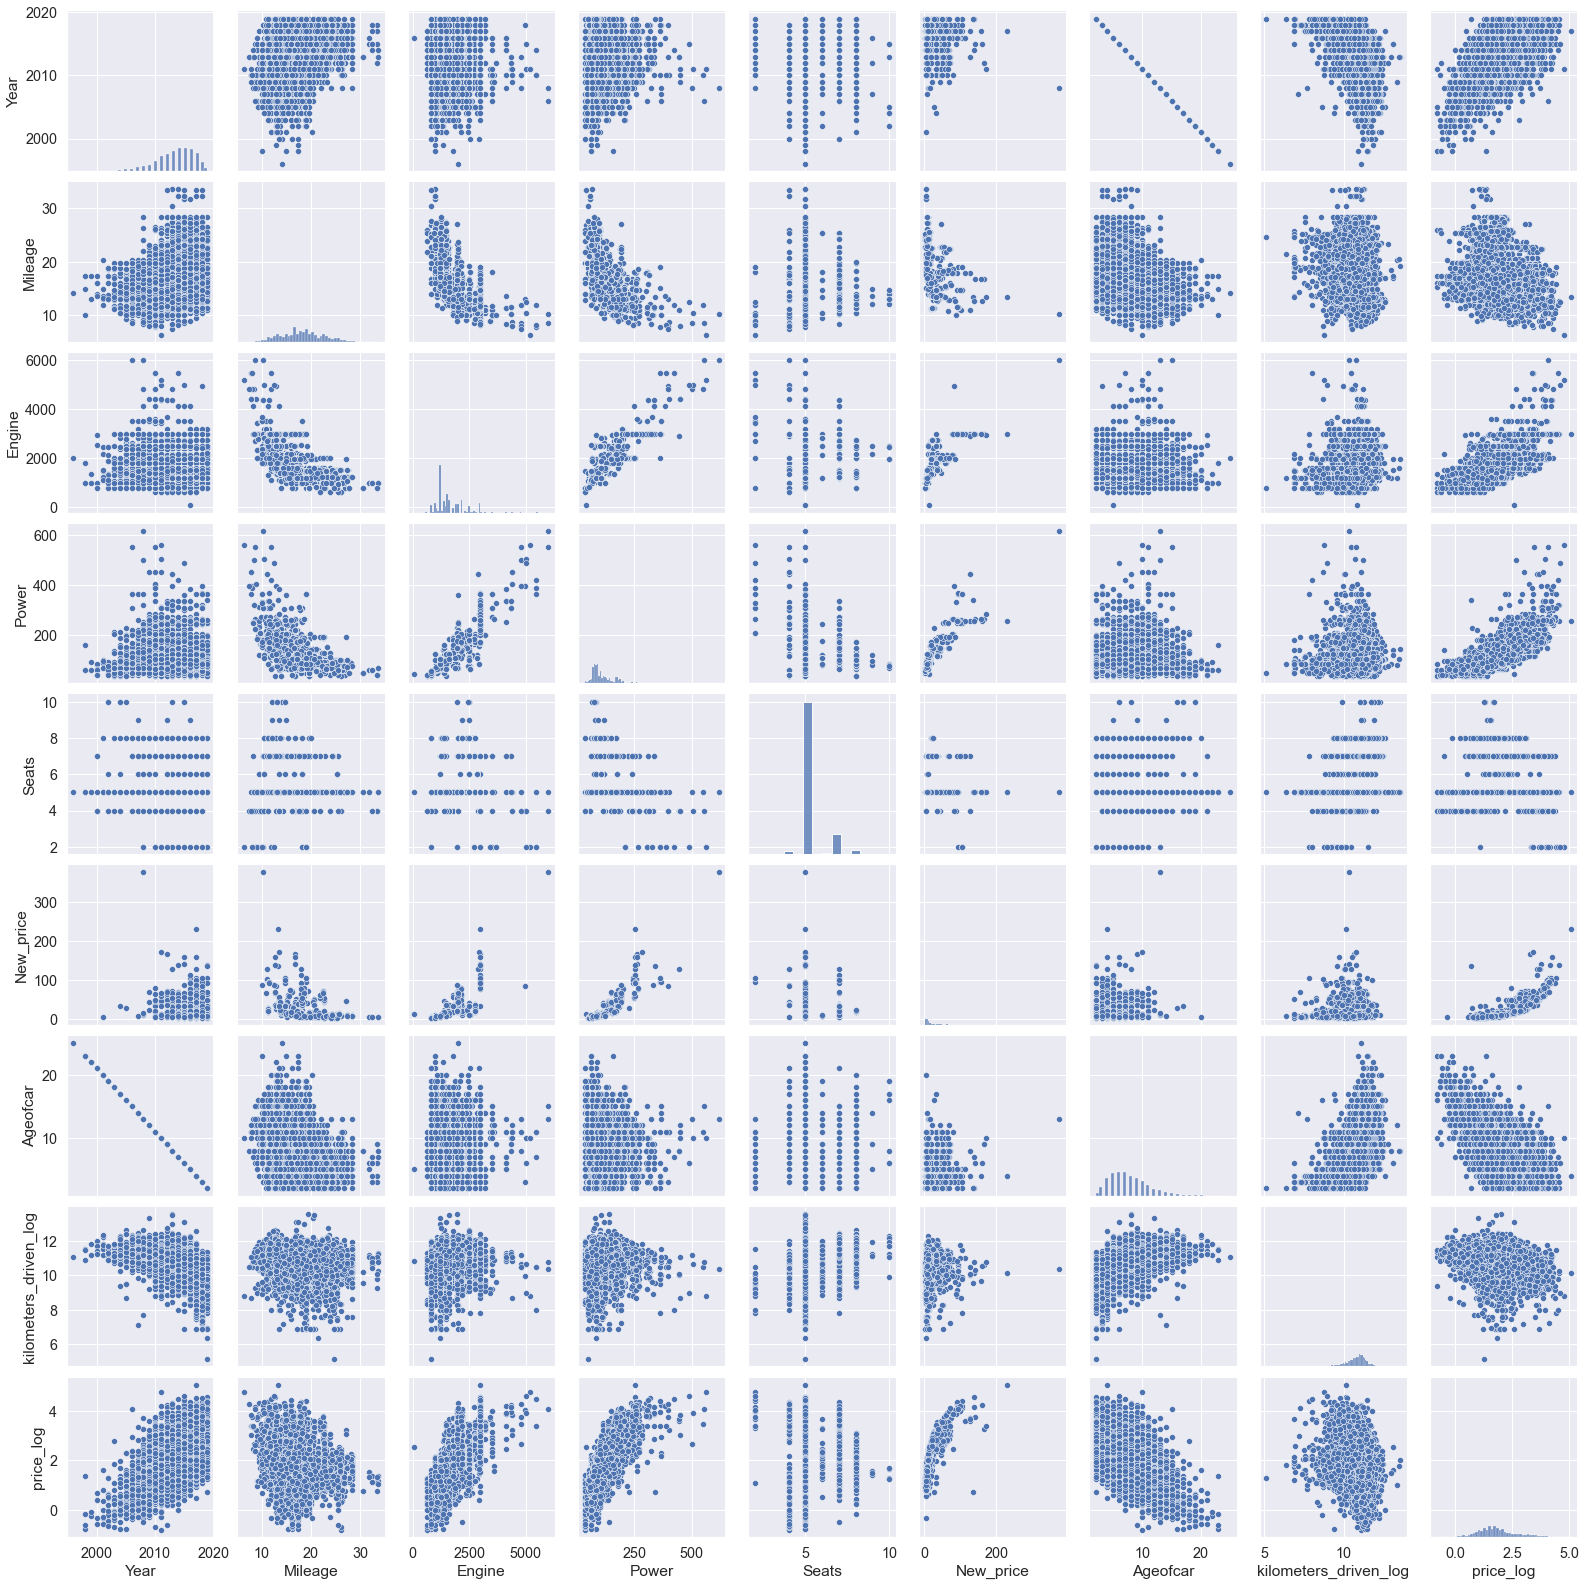

In [467]:
#sns.pairplot(data.drop(['Price','Kilometers_Driven'],axis=1))


#### **Observations and Insights from all plots: _____**
- Some plots shpw that the data is completely random and there is no relationship between the two festured.  like engine and year, Mileage and km driven, Mileage and year, etc.
- Some plots show that there is no good relationship between some features. But we can see a pattern that, as one goes up, the other goes down or up. like power and mileage, etc.
- Some plots show positive correlation between them and good predictive power to predict the sale such as power and price log, or power and engine, or engine and price log, year and price log, etc.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

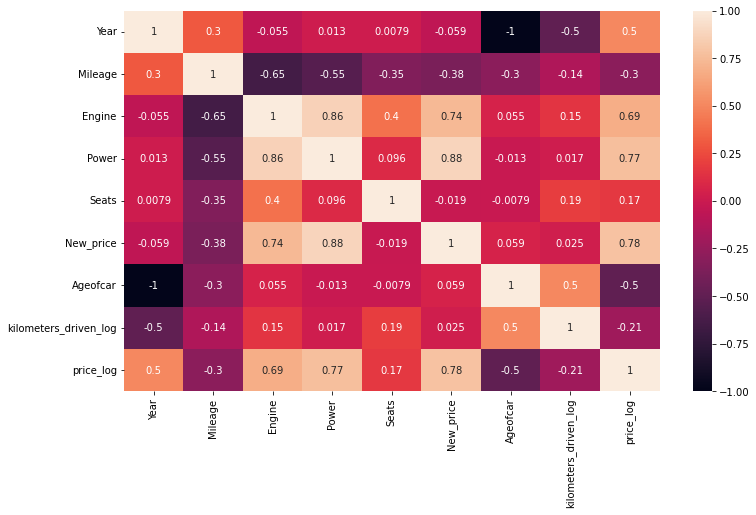

In [90]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Price','Kilometers_Driven'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: _____**
**These are the highest correlations between the features:**
- Over 80%: Power-New_Price, Power-Engine
- 70%-80%: Power-Price_Log, Engine-New_Price, New_Price-Price_log
- 60%-70%: Engine-Price_log

**These are the lowest correlations between the features:**
- upto 10%: Year-Engine, New_Price-km_Driven_Log, Seats-New_Price, km_Driven-Power, Seats-Power, Seats-Year, Power-Year, New_Price-Year

**These are the Negative Correlations:**
- km_Driven_Log-Price_log, Price_log-Mileage, Mileage-km_Driven_Log, km_Driven_Log-Year, New_Price-Year, New_Price-Mileage, New_Price-Seats, Seats-Mileage, New_Price-Seats, Power-Mileage, Mileage-Engine, Mileage-Power, Mileage-Seats, Mileage-New_price, Year-Engine


### **3. Box plot**

In [91]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

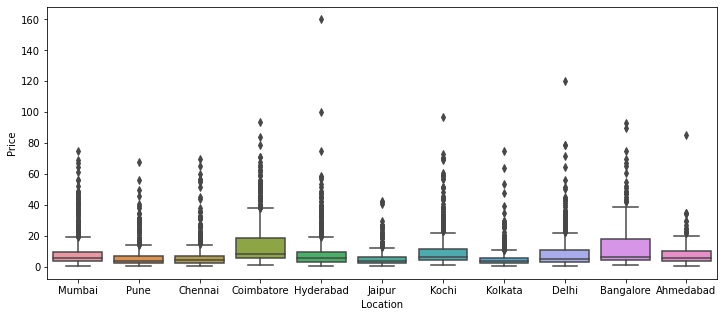

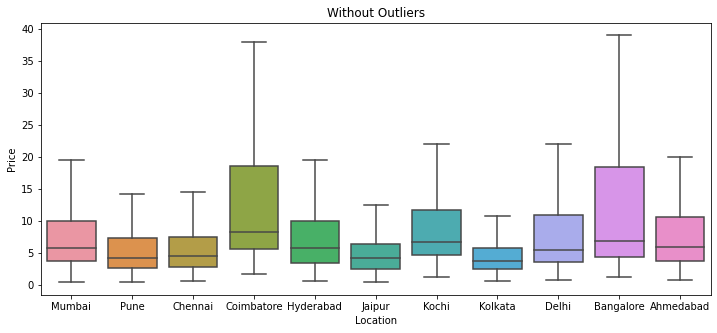

In [92]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

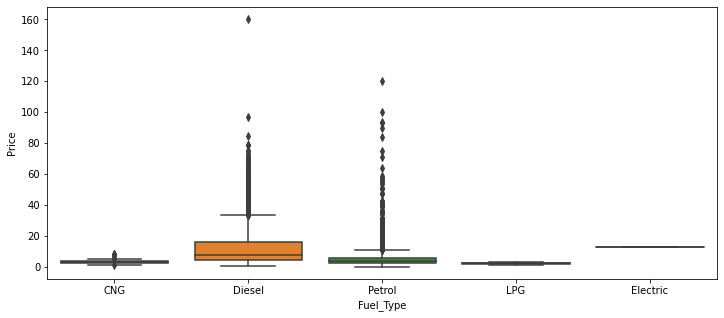

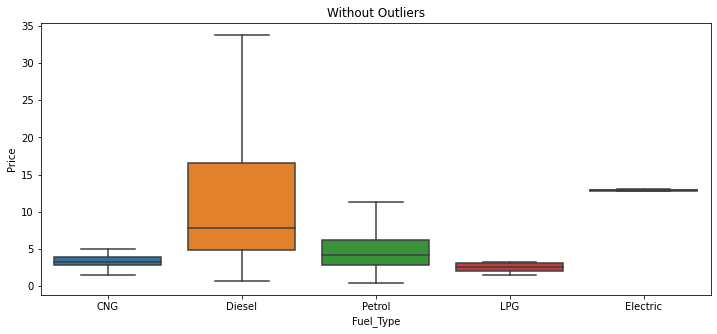

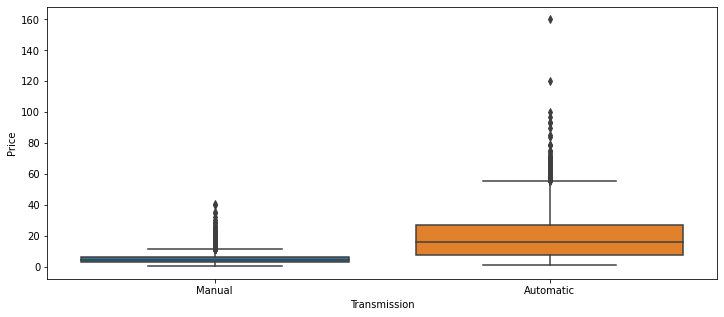

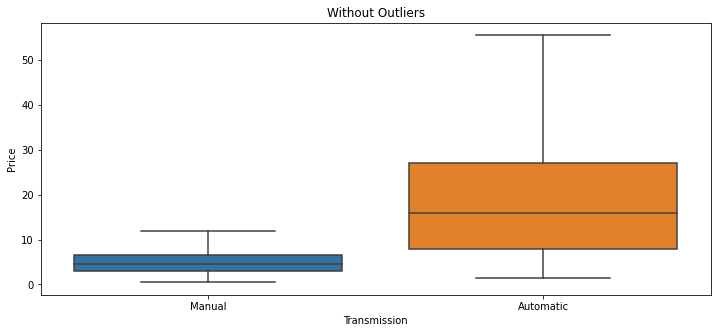

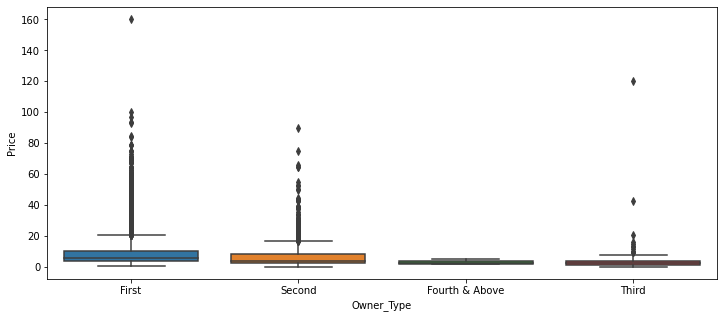

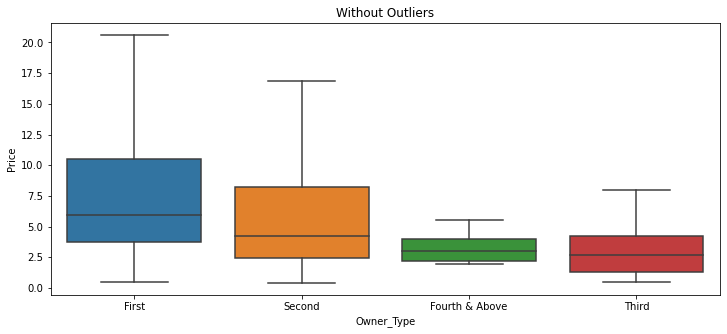

In [93]:
boxplot(data['Fuel_Type'])
boxplot(data['Transmission'])
boxplot(data['Owner_Type'])

**Observations and Insights for all plots**


### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [94]:
# We should separate Brand Name from the Name
data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  Ageofcar  kilometers_driven_log  price_log    Brand  \
0        NaN   1.75        11              11.184421   0.559616   Maruti   
1        NaN  12.50         6              10.621327   2.525729  Hyundai   
2       8.61   4.50        10              10.736397   1.504077    Honda   
3        NaN   6.00         9              11.373663   1.791759   Maruti   
4        NaN  17.74         8              10.613246   2.875822     Audi   

       Model  
0     WagonR  
1   Creta1.6  
2      JazzV  
3  ErtigaVDI  
4      A4New

In [95]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [96]:
#from here, we can see some brands are either the same but written differently such as ISUZU and Isuzu which should be the same, 
#and some are not complete, such as mini cooper which shows mini or land rover which shows land
IncompleteCol=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
data[data.Brand.isin(IncompleteCol)].sample(10)

Name    Location  Year  \
1505               Land Rover Range Rover Sport SE       Kochi  2019   
410               Land Rover Range Rover 2.2L Pure  Coimbatore  2014   
365                          Mini Clubman Cooper S        Pune  2017   
6367    Land Rover Freelander 2 S Business Edition       Kochi  2015   
2178       Land Rover Discovery HSE Luxury 3.0 TD6      Mumbai  2017   
7157              Land Rover Range Rover 2.2L Pure   Hyderabad  2015   
5416      Land Rover Range Rover Vogue SE 4.4 SDV8  Coimbatore  2013   
4701                    Land Rover Freelander 2 SE        Pune  2014   
5067  Land Rover Discovery Sport SD4 HSE Luxury 7S  Coimbatore  2019   
3043            Land Rover Discovery Sport TD4 HSE  Coimbatore  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
1505              26013    Diesel    Automatic      First    12.65  2993.0   
410               95649    Diesel    Automatic      First    12.70  2179.0   
365                8350    Petrol       Manual      First    13.80  1998.0   
6367              61062    Diesel    Automatic      First    12.39  2179.0   
2178              35000    Diesel    Automatic      First    18.00  2993.0   
7157              49000    Diesel    Automatic     Second    12.70  2179.0   
5416              75995    Diesel    Automatic     Second    11.49  4367.0   
4701              85000    Diesel    Automatic     Second    12.39  2179.0   
5067              17201    Diesel    Automatic      First    12.51  2179.0   
3043              25899    Diesel    Automatic      First    12.63  2179.0   

       Power  Seats  New_price  Price  Ageofcar  kilometers_driven_log  \
1505  255.00    5.0     139.00  97.07         2              10.166352   
410   187.70    5.0        NaN  29.67         7              11.468441   
365   192.00    5.0      44.59  35.00         4               9.030017   
6367  147.51    5.0        NaN    NaN         6              11.019645   
2178  255.00    7.0     127.00  41.60         4              10.463103   
7157  187.70    5.0        NaN    NaN         6              10.799576   
5416  335.30    5.0        NaN  65.81         8              11.238423   
4701  147.51    5.0        NaN  23.00         7              11.350407   
5067  187.70    7.0        NaN  58.91         2               9.752723   
3043  147.50    5.0        NaN  55.70         2              10.161960   

      price_log Brand            Model  
1505   4.575432  Land       RoverRange  
410    3.390136  Land       RoverRange  
365    3.555348  Mini    ClubmanCooper  
6367        NaN  Land  RoverFreelander  
2178   3.728100  Land   RoverDiscovery  
7157        NaN  Land       RoverRange  
5416   4.186772  Land       RoverRange  
4701   3.135494  Land  RoverFreelander  
5067   4.076011  Land   RoverDiscovery  
3043   4.019980  Land   RoverDiscovery

In [97]:
#Here we will change those brand names:
data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'
data.loc[data.Brand=='Mini','Brand']='Mini Cooper'
data.loc[data.Brand=='Land','Brand']='Land Rover'
data.Brand.nunique()

32

In [98]:
data.groupby(data.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [99]:
data.Model.isnull().sum()

1

In [100]:
#There is one car in the dataset with null value in the Model which we will have to drop it:
data.dropna(subset=['Model'],axis=0,inplace=True)
data.Model.nunique()

726

In [101]:
data.groupby('Model')['Model'].size().nlargest(10)

Model
SwiftDzire    189
Grandi10      179
WagonR        178
Innova2.5     145
Verna1.6      127
City1.5       122
Cityi         115
Creta1.6      110
NewC-Class    110
3Series       109
Name: Model, dtype: int64

#### **Observations and Insights: _____**
- The brand and Model (Or brand and Model) which was taken from Name is now can be used for both prediction of sales and also treat some null values as well based on the brand.
- There are 32 unique Brands. Maruti brand is the highest number in our dataset followed by Hyundai.
- There are 726 unique models and Swift Dzire is highest number.

### **Missing value treatment**

In [102]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                      53
New_price                6245
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7251 non-null   object 
 1   Location               7251 non-null   object 
 2   Year                   7251 non-null   int64  
 3   Kilometers_Driven      7251 non-null   int64  
 4   Fuel_Type              7251 non-null   object 
 5   Transmission           7251 non-null   object 
 6   Owner_Type             7251 non-null   object 
 7   Mileage                7168 non-null   float64
 8   Engine                 7205 non-null   float64
 9   Power                  7076 non-null   float64
 10  Seats                  7198 non-null   float64
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  Ageofcar               7251 non-null   int64  
 14  kilometers_driven_log  7251 non-null   float64
 15  pric

In [104]:
data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7251.000000        7251.000000  7168.000000  7205.000000  7076.000000   
mean   2013.366018       57811.930079    18.347437  1616.414018   112.748189   
std       3.253106       37502.011153     4.158107   595.140802    53.472430   
min    1996.000000         171.000000     6.400000    72.000000    34.200000   
25%    2011.000000       34000.000000    15.300000  1198.000000    75.000000   
50%    2014.000000       53416.000000    18.200000  1493.000000    94.000000   
75%    2016.000000       73000.000000    21.100000  1968.000000   138.100000   
max    2019.000000      775000.000000    33.540000  5998.000000   616.000000   

             Seats    New_price        Price     Ageofcar  \
count  7198.000000  1006.000000  6018.000000  7251.000000   
mean      5.280495    22.779692     9.470243     7.633982   
std       0.809376    27.759344    11.165926     3.253106   
min       2.000000     3.910000     0.440000     2.000000   
25%       5.000000     7.885000     3.500000     5.000000   
50%       5.000000    11.570000     5.640000     7.000000   
75%       5.000000    26.042500     9.950000    10.000000   
max      10.000000   375.000000   160.000000    25.000000   

       kilometers_driven_log    price_log  
count            7251.000000  6018.000000  
mean               10.760290     1.824705  
std                 0.714085     0.873606  
min                 5.141664    -0.820981  
25%                10.434116     1.252763  
50%                10.885866     1.729884  
75%                11.198215     2.297573  
max                13.560618     5.075174

#### **Observations and Insights: _____**
- There are no missing value in location, year, km driven (therefore kn driven log), fuel type, transmission, and owner type.
- There are 46 missing value  in engine, 175 in power, 53 in Seats, 6246 in New_Price, and 1234 in Price (therefore same in log price)
- Later on we should decide on how to treat these missing values.
- Price of 160K is too much for a car, probably this is an outlier.

In [105]:
#We can check to see how many missing values per row are there for each variable
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

1    5029
3    1045
0     819
2     283
4      48
5      17
6       9
7       1
dtype: int64

In [106]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage         5
New_price    5024
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
Mileage       25
Power         75
Seats          1
New_price    101
Price        182
price_log    182
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage        29
Power          32
Seats           5
New_price    1045
Price        1012
price_log    1012
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage       6
Engine       25
Power        42
Seats        25
New_price    48
Price        23
price_log    23
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage      17
Engine       11
Power        16
Seats        12
New_price    17
Price         6
price_log   

In [107]:
#We start with the highest missing value to figure out what to do:
data[num_missing==7]

Name Location  Year  Kilometers_Driven Fuel_Type  \
6633  Mahindra TUV 300 P4  Kolkata  2016              27000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
6633       Manual      First      NaN     NaN    NaN    NaN        NaN    NaN   

      Ageofcar  kilometers_driven_log  price_log     Brand   Model  
6633         5              10.203592        NaN  Mahindra  TUV300

**Missing values in Seats**

In [108]:
# Checking missing values in the column 'Seats'
#data.isnull().Seats
data['Seats'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Name: Seats, Length: 7251, dtype: bool

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

In [109]:
#We already had separated Name into Brand and Model.

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [110]:
# Impute missing values in Seats,you can use fillna method in pandas
null_Seats = pd.isnull(data["Seats"])
data[null_Seats]

Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
229                               Ford Figo Diesel   Bangalore  2015   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917                            Honda City 1.5 EXI      Jaipur  2005   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  2012   
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2369                             Maruti Estilo LXI     Chennai  2008   
2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737                             Maruti Wagon R Vx      Jaipur  2001   
2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3800                   Ford Endeavour Hurricane LE      Mumbai  2012   
3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
3882                             Maruti Estilo LXI     Kolkata  2010   
4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604                     Honda Jazz Select Edition        Pune  2011   
4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712                        Hyundai Santro Xing XG        Pune  2003   
4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270                            Honda City 1.5 GXI   Bangalore  2002   
5893                             Maruti Estilo LXI     Chennai  2008   
6042                  Skoda Laura 1.8 TSI Ambition   Bangalore  2009   
6541         Toyota Etios Liva Diesel TRD Sportivo   Bangalore  2012   
6544                 Hyundai i20 new Sportz AT 1.4   Bangalore  2012   
6633                           Mahindra TUV 300 P4     Kolkata  2016   
6643                       BMW 5 Series 520d Sedan   Bangalore  2009   
6651                          Maruti Swift 1.3 VXi     Kolkata  2015   
6677                        Fiat Punto 1.4 Emotion      Jaipur  2010   
6685                          Maruti Swift 1.3 VXi        Pune  2010   
6880                       BMW 5 Series 520d Sedan     Chennai  2009   
6902                           Toyota Etios Liva V       Kochi  2012   
6957                        Honda Jazz 2020 Petrol       Kochi  2019   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
194               60006    Petrol       Manual           First      NaN   
208    

In [111]:
#Now we will be using the combination of Brand and Model and use median of that number to fill in the missing values for Seats

data['Seats'] = data['Seats'].fillna(data.groupby('Name')['Seats'].transform('median'))

In [112]:
data['Seats'].isnull().sum()

46

In [113]:
#Now we can group and fill null value based on the model of the car
data['Seats'] = data['Seats'].fillna(data.groupby('Model')['Seats'].transform('median'))

In [114]:
data['Seats'].isnull().sum()

22

In [115]:
#There are 22 left and most of the cars are 5 seaters. Therefore, we fill in the rest of them with 5
data['Seats']=data['Seats'].fillna(5)

In [116]:
# Now that we only have three null values, we can use the median based on the brand only.
null_Seats = pd.isnull(data["Seats"])
data[null_Seats]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price, Ageofcar, kilometers_driven_log, price_log, Brand, Model]
Index: []

**Missing values for Mileage**

In [117]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                       0
New_price                6245
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [118]:
# Impute missing Mileage. For example use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby('Name')['Mileage'].transform('median'))
data['Mileage'] = data['Mileage'].fillna(data.groupby(['Brand','Model'])['Mileage'].transform('median'))
data['Mileage'].isnull().sum()

32

In [119]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     46
Power                     175
Seats                       0
New_price                6245
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

**Missing values for Engine**

In [120]:
# For Engine, we can use Brand and Mdodel first
data['Engine'] = data['Engine'].fillna(data.groupby('Name')['Engine'].transform('median'))
data['Engine'] = data['Engine'].fillna(data.groupby(['Brand','Model'])['Engine'].transform('median'))
data['Engine'].isnull().sum()

18

In [121]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     18
Power                     175
Seats                       0
New_price                6245
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

**Missing values for Power**

In [122]:
# For Power also,, we can use Brand and Mdodel first
data['Power'] = data['Power'].fillna(data.groupby('Name')['Power'].transform('median'))
data['Power'] = data['Power'].fillna(data.groupby(['Brand','Model'])['Power'].transform('median'))
data['Power'].isnull().sum()

63

In [123]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     18
Power                      63
Seats                       0
New_price                6245
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

**Missing values for New_price**

In [124]:
data.New_price.isnull().sum()

6245

In [125]:
#First we will use the Name and remove some of the missing data:
data['New_price'] = data['New_price'].fillna(data.groupby('Name')['New_price'].transform('median'))
data.New_price.isnull().sum()

6018

In [126]:
data['New_price'] = data['New_price'].fillna(data.groupby(['Brand','Model'])['New_price'].transform('median'))
data.New_price.isnull().sum()

4577

In [127]:
#Just based on the brand now:
data['New_price'] = data['New_price'].fillna(data.groupby('Brand')['New_price'].transform('median'))
data.New_price.isnull().sum()

158

In [128]:
#Now that we have filled in the values as much as possible, we will see how many is left:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     18
Power                      63
Seats                       0
New_price                 158
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [129]:
#Now we can fill in the Engine, Power, and Mileage with their median values for the missing data
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())
data['Power'] = data['Power'].fillna(daeamta['Power'].median())
data['Engine'] = data['Engine'].fillna(data['Engine'].median())

In [130]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                 158
Price                    1233
Ageofcar                    0
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [131]:
#Now we will drop the remaining null values, whatever is left:
data.dropna(inplace=True,axis=0)
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
Ageofcar                 0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

#### **Observations for missing values after imputing: _____**

- Some missing values were dropped, some were taken from median values based on other features such as Brand and Model of the car, or Engine and Power, or a combination of all.

In [132]:
data.shape

(5891, 18)

In [133]:
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  Ageofcar  kilometers_driven_log  price_log    Brand  \
0      5.440   1.75        11              11.184421   0.559616   Maruti   
1     16.060  12.50         6              10.621327   2.525729  Hyundai   
2      8.610   4.50        10              10.736397   1.504077    Honda   
3     11.215   6.00         9              11.373663   1.791759   Maruti   
4     53.140  17.74         8              10.613246   2.875822     Audi   

       Model  
0     WagonR  
1   Creta1.6  
2      JazzV  
3  ErtigaVDI  
4      A4New

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

# **Milestone 2**

In [134]:
# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [135]:
# Step-1
cars_data = data
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven','Year'],axis=1)
y = cars_data[["price_log", "Price"]]
X.head()

Location Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  \
0      Mumbai       CNG       Manual      First    26.60   998.0   58.16   
1        Pune    Diesel       Manual      First    19.67  1582.0  126.20   
2     Chennai    Petrol       Manual      First    18.20  1199.0   88.70   
3     Chennai    Diesel       Manual      First    20.77  1248.0   88.76   
4  Coimbatore    Diesel    Automatic     Second    15.20  1968.0  140.80   

   Seats  New_price  Ageofcar  kilometers_driven_log    Brand      Model  
0    5.0      5.440        11              11.184421   Maruti     WagonR  
1    5.0     16.060         6              10.621327  Hyundai   Creta1.6  
2    5.0      8.610        10              10.736397    Honda      JazzV  
3    7.0     11.215         9              11.373663   Maruti  ErtigaVDI  
4    5.0     53.140         8              10.613246     Audi      A4New

In [136]:
y.head()

price_log  Price
0   0.559616   1.75
1   2.525729  12.50
2   1.504077   4.50
3   1.791759   6.00
4   2.875822  17.74

In [137]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [138]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4123, 711) (1768, 711)


In [139]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4123, 711)
X_test: (1768, 711)
y_train: (4123, 2)
y_test: (1768, 2)


In [140]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [141]:
y_train.head()

price_log  Price
4615   3.238678  25.50
4172   1.360977   3.90
1571   0.955511   2.60
2295   1.599388   4.95
4185   4.110054  60.95

In [142]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [143]:
# Create a linear regression model
lr = LinearRegression()

In [144]:
# Fit linear regression model
lr.fit(X_train,y_train['price_log']) 

LinearRegression()

In [145]:
# Get score of the model.
print('Score of Linear Regression using *Log_Price* as target Value:')
LR_score = get_model_score(lr)

Score of Linear Regression using *Log_Price* as target Value:


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [146]:
print('Average Price of the cars in this data set is: ', y['Price'].mean())
print('Average Log Price of the cars in this data set is: ', y['price_log'].mean())

Average Price of the cars in this data set is:  9.586010864029863
Average Log Price of the cars in this data set is:  1.8421350331303832


In [147]:
#N###ow we use Price as target Value

lr_Price = LinearRegression()
lr_Price.fit(X_train,y_train['Price']) 
print('Score of Linear Regression using *Price* as target Value:')
LR_Price_score = get_model_score(lr_Price)

Score of Linear Regression using *Price* as target Value:


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### **Observations from results: _____**
- R Square is 0.96 which is not bad for the trainging set
- R Square is 0.93 which is less than 10% difference with the training set so it is not much overfitting or underfitting.
- RMSE has the same unit as predicted value (Price) which is 100K INR. Approximately 2 difference is 200K INR which is over 3K CAD and is quite high when it comes to the price of a car. To understand the magnitude of this, we can divide this to the average of price that we have and see how many percentage difference this is (which we did above). ~ 2 RMSE for a price log which the average of it is 1.84 is quite high. So our Error here is a lot and we need to change or redo the model.

#### **Important variables of Linear Regression**

Building a model using statsmodels

In [148]:
y_train.head()

price_log  Price
4615   3.238678  25.50
4172   1.360977   3.90
1571   0.955511   2.60
2295   1.599388   4.95
4185   4.110054  60.95

In [149]:
print(X_train.shape)
print(X_test.shape)

(4123, 711)
(1768, 711)


In [150]:
print(y_train.shape)
print(y_test.shape)

(4123, 2)
(1768, 2)


In [151]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:15:41   Log-Likelihood:                 2160.8
No. Observations:                4123   AIC:                            -3062.
Df Residuals:                    3493   BIC:                             922.8
Df Model:                         629                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [152]:
#### **Observations from results: _____**
#- Both R Square and Adjusted R Square are quite high which means that we have been able to create a model that is able to explain variance in price of used cars for upto ~97%.
#- The model is not underfitting or overfitting.

In [153]:
def get_model_score1(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(x_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(x_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

In [154]:
print('Score for olsmodel1 is:\n')
get_model_score1(olsmodel1)

Score for olsmodel1 is:

R-sqaure on training set :  0.960469860775225
R-square on test set :  0.932396111288739
RMSE on training set :  2.277712471503664
RMSE on test set :  2.702528812076986


[0.960469860775225, 0.932396111288739, 2.277712471503664, 2.702528812076986]

In [155]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [156]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

coef           pval
Model_800DX            -4.379530e-01   4.875124e-02
Model_SCross            3.411825e-01   4.859184e-02
Model_Punto1.3          1.179807e-12   4.847170e-02
Model_CorollaExecutive -1.328330e-12   4.760079e-02
Model_Laura1.8         -2.184276e-01   4.684328e-02
...                              ...            ...
Model_Creta1.6          4.806319e-01   1.964674e-72
Model_CayenneBase      -3.319699e+00  4.805045e-106
Brand_Tata             -1.105622e+00  5.859512e-109
const                   3.663631e+00  7.900120e-158
Ageofcar               -1.033454e-01   0.000000e+00

[388 rows x 2 columns]

In [157]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Location', 'Fuel_Type', 'Brand', 'New_price', 'Power', 'Owner_Type', 'Transmission', 'kilometers_driven_log', 'Ageofcar']


<b>Build Ridge / Lasso Regression similar to Linear Regression:</b><br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [158]:
# import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [159]:
# Create a Ridge regression model
ridge = Ridge()

In [160]:
# Fit Ridge regression model.
ridge.fit(X_train, y_train['price_log'])

Ridge()

In [161]:
print('Score for ridge using Price as target value is:\n')
get_model_score(ridge)

Score for ridge using Price as target value is:

R-sqaure on training set :  0.9504085391143862
R-square on test set :  0.9299117213168069
RMSE on training set :  2.5511628309611947
RMSE on test set :  2.751738693741939


[0.9504085391143862, 0.9299117213168069, 2.5511628309611947, 2.751738693741939]

In [162]:
## Observation:
# - The R-Square is quite high on both test and train data set.
# - MSE is quite low on price log for both test and train (0.02 and 0.03)
# - In general, this model is much better than ols and liner Regression considering the MSE.

In [163]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train['price_log'])
print('Score for Lasso using price_log as target value is:\n')
get_model_score(lasso)

Score for Lasso using price_log as target value is:

R-sqaure on training set :  -23.353396959662597
R-square on test set :  0.3903701444584614
RMSE on training set :  56.53462316526904
RMSE on test set :  8.115543453948833


[-23.353396959662597, 0.3903701444584614, 56.53462316526904, 8.115543453948833]

In [164]:
from sklearn.linear_model import Lasso
lasso2 = Lasso()
lasso2.fit(X_train, y_train['Price'])
print('Score for Lasso using Price as target value is:\n')
get_model_score(lasso2)

Score for Lasso using Price as target value is:

R-sqaure on training set :  -2.658657780496845e+99
R-square on test set :  -1.2084419572517248e+48
RMSE on training set :  5.906986078332731e+50
RMSE on test set :  1.1426083446715846e+25


[-2.658657780496845e+99,
 -1.2084419572517248e+48,
 5.906986078332731e+50,
 1.1426083446715846e+25]

In [165]:
# R Square is very low and MSE is quite high, so Lasso is definitely not a good option

In [166]:
# Here we can only use the most important features and get the linear regression and 

In [167]:
y_train.head()

price_log  Price
4615   3.238678  25.50
4172   1.360977   3.90
1571   0.955511   2.60
2295   1.599388   4.95
4185   4.110054  60.95

In [168]:
# We can see that R square is quite high. 0.97 and adjusted R Square is also high 0.96. F Statistic is 202.
# Not all the variables are statistically significant to predict the outcome variable.
# In order to check which ones are statistically significant to predict the target variable, we need to check the p-value against all the independent variables.

In [169]:
# Firsy we can check the null hypothesis between the independent variable Age of the Car and the dependent variable Price/Log Price to identify if there is any relationship between them or not
# Null hypothesis: There is nothing going on or there is no relationship between variables Age of the Car and Price/Log Price
# Alternate hypothesis: There is something a relationship between variables Age of the Car and Price


In [170]:
#R Square decresed which means other variables were adding values. The features are also showing the same importance as before. Therefore, scaling did not make any difference in the model.
#The features that are showing important are not exactly the ones that were showing the first two model. and since R square decreased, we will go with the first two models rather than this one.

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [171]:
# import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [172]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state=1)

In [173]:
# Fit decision tree regression model.
dtree.fit(X_train,y_train["price_log"])

DecisionTreeRegressor(random_state=1)

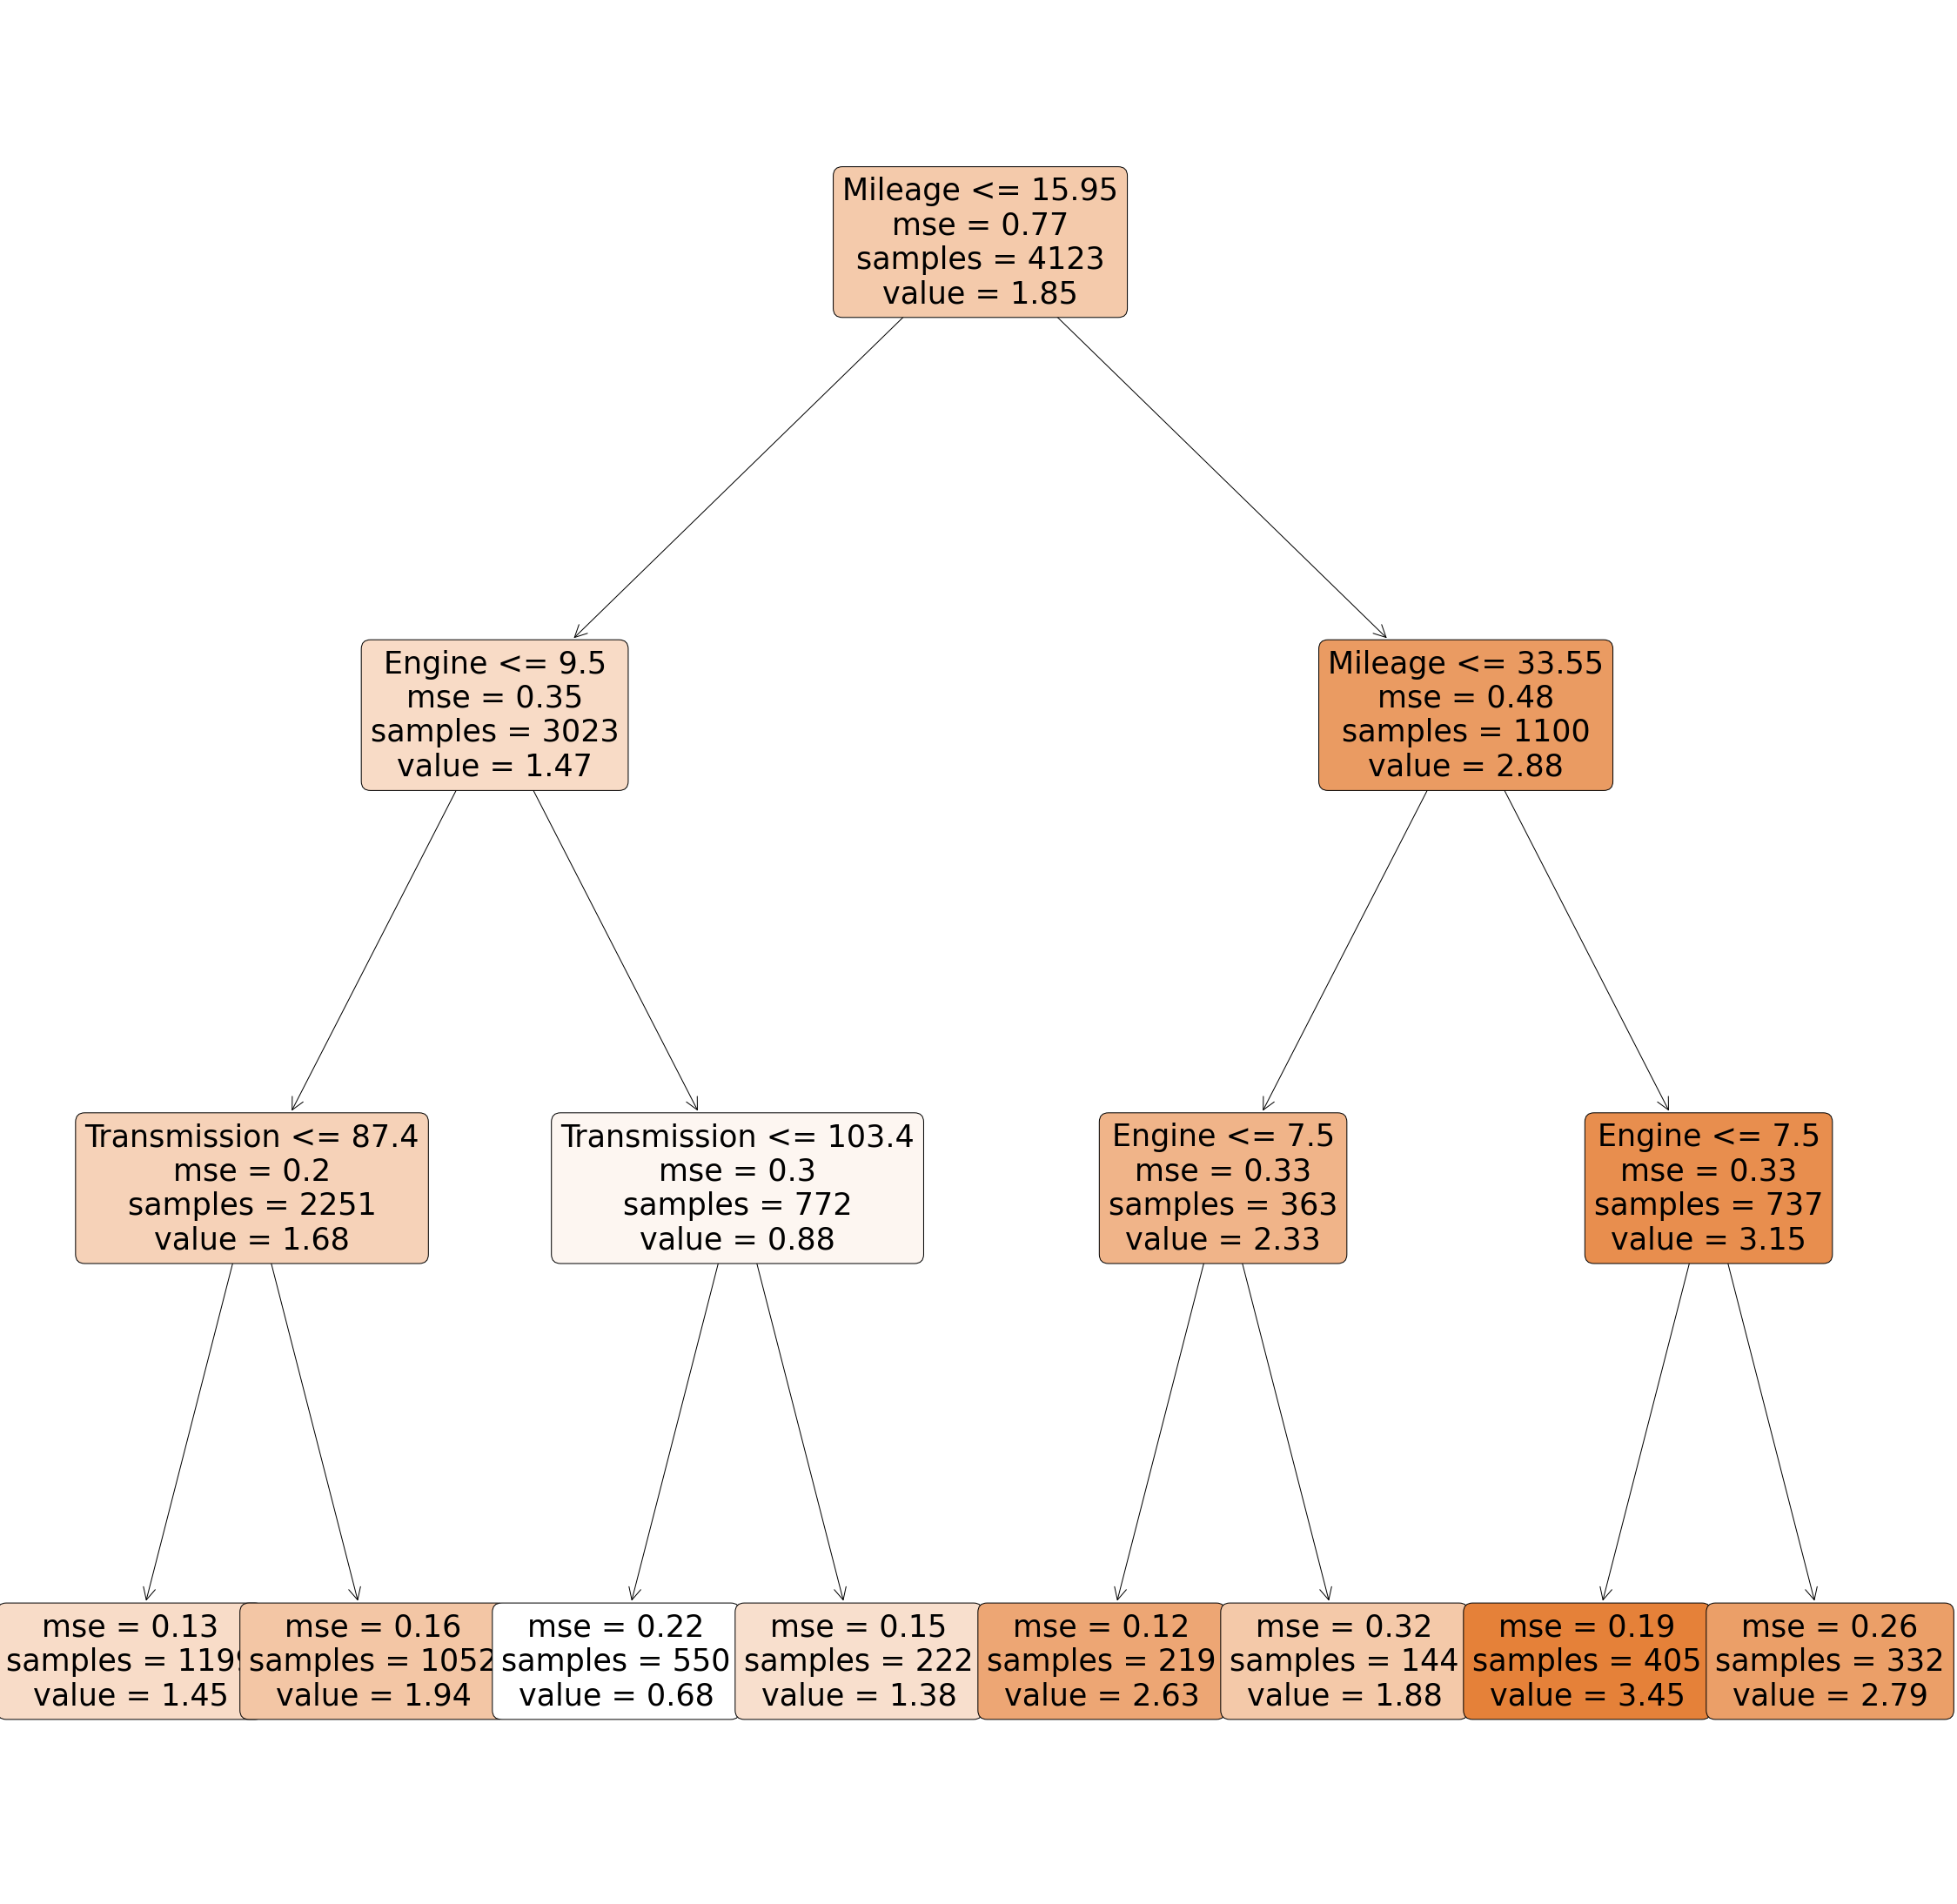

In [174]:
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Import tools needed for visualization
features = cars_data.drop(['Name','Price','price_log','Kilometers_Driven','Year'],axis=1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


# create and train model
clf = tree.DecisionTreeRegressor(random_state=1,max_depth=3)  # set hyperparameter
clf.fit(X_train,y_train['price_log'])

#, 
# plot tree
plt.figure(figsize=(40,40))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names=feature_list, fontsize=35, rounded = True, precision = 2, proportion = False, filled= True)
plt.show()

In [175]:
dtree_Price = DecisionTreeRegressor(random_state=1)
dtree_Price.fit(X_train,y_train["Price"])
print('Decision Tree Model Score using Price as the target value:\n')
Dtree_model = get_model_score(dtree_Price)

Decision Tree Model Score using Price as the target value:

R-sqaure on training set :  -1.7416120410636126e+133
R-square on test set :  -7.566153159147699e+81
RMSE on training set :  4.780908556607184e+67
RMSE on test set :  9.041116341874446e+41


In [176]:
get_model_score(dtree)

R-sqaure on training set :  0.9999997874419256
R-square on test set :  0.8761292592531483
RMSE on training set :  0.005281697587559449
RMSE on test set :  3.6582119239940596


[0.9999997874419256,
 0.8761292592531483,
 0.005281697587559449,
 3.6582119239940596]

In [177]:
get_model_score(clf)

R-sqaure on training set :  0.649808245898057
R-square on test set :  0.7221762500876359
RMSE on training set :  6.779344218625169
RMSE on test set :  5.478594763969259


[0.649808245898057, 0.7221762500876359, 6.779344218625169, 5.478594763969259]

In [178]:
dtree.score(X_train,y_train['price_log'])

0.9999986427213011

#### **Observations from results: _____**
- With OLS model, we grabbed important features which are :  ['Model', 'Location', 'Fuel_Type', 'Brand', 'New_price', 'Power', 'Owner_Type', 'Transmission', 'kilometers_driven_log', 'Year', 'Ageofcar']
- In the models that we used Price, we had quite high MSE errors. Therefore, we will only show the price log as target feature here.
- Decision Tree Model Score using Price as the target value:
    R-sqaure on training set :  -1.7416120410636126e+133
    R-square on test set :  -7.566153159147743e+81
    RMSE on training set :  4.780908556607184e+67
    RMSE on test set :  9.041116341874472e+41
- Decision Tree Model Score using Log_Price as the target value:
    R-sqaure on training set :  0.9999997874419256
    R-square on test set :  0.8803036133743471
    RMSE on training set :  0.005281697587559449
    RMSE on test set :  3.5960441389151008
    
- *********Training set Metrics-Lasso Model**************
    R-Squared: 0.7416209152453695
    MSE:  price_log     0.207727
    Price        32.423070
    dtype: float64
    ********Validation set Metrics-Lasso Model**************
    R-Squared: 0.7589812437435361
    MSE:  
        price_log     0.172735
        Price        26.209603
    dtype: float64
 
- *********Training set Metrics-Ridge Model**************
    R-Squared: 0.9306626552138673
    MSE:
        price_log     0.024883
        Price        13.959799
    dtype: float64
- ********Validation set Metrics-Ridge Model**************
    R-Squared: 0.9115112746769061
    MSE:
        price_log     0.030466
        Price        14.557554
    dtype: float64

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


In [179]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.566412
Ageofcar               0.217676
Power                  0.132921
Engine                 0.014571
kilometers_driven_log  0.012568
...                         ...
Model_Ignis1.2         0.000000
Model_HexaXTA          0.000000
Model_HexaXT           0.000000
Model_GetzGLS          0.000000
Model_redi-GOT         0.000000

[711 rows x 1 columns]


In [180]:
pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10)

Imp
New_price              0.566412
Ageofcar               0.217676
Power                  0.132921
Engine                 0.014571
kilometers_driven_log  0.012568
Mileage                0.005725
Brand_Tata             0.003990
Location_Kolkata       0.003952
Location_Hyderabad     0.003590
Model_CayenneBase      0.003205

In [181]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_4 <= 15.95
|   |--- feature_5 <= 9.50
|   |   |--- feature_2 <= 87.40
|   |   |   |--- feature_2 <= 69.51
|   |   |   |   |--- feature_5 <= 5.50
|   |   |   |   |   |--- feature_4 <= 8.52
|   |   |   |   |   |   |--- feature_5 <= 4.50
|   |   |   |   |   |   |   |--- feature_2 <= 56.70
|   |   |   |   |   |   |   |   |--- feature_5 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_367 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_367 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [1.06]
|   |   |   |   |   |   |   |   |--- feature_5 >  3.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 15.40
|   |   |   |   |   |   |   |   |   |   |--- value: [1.06]
|   |   

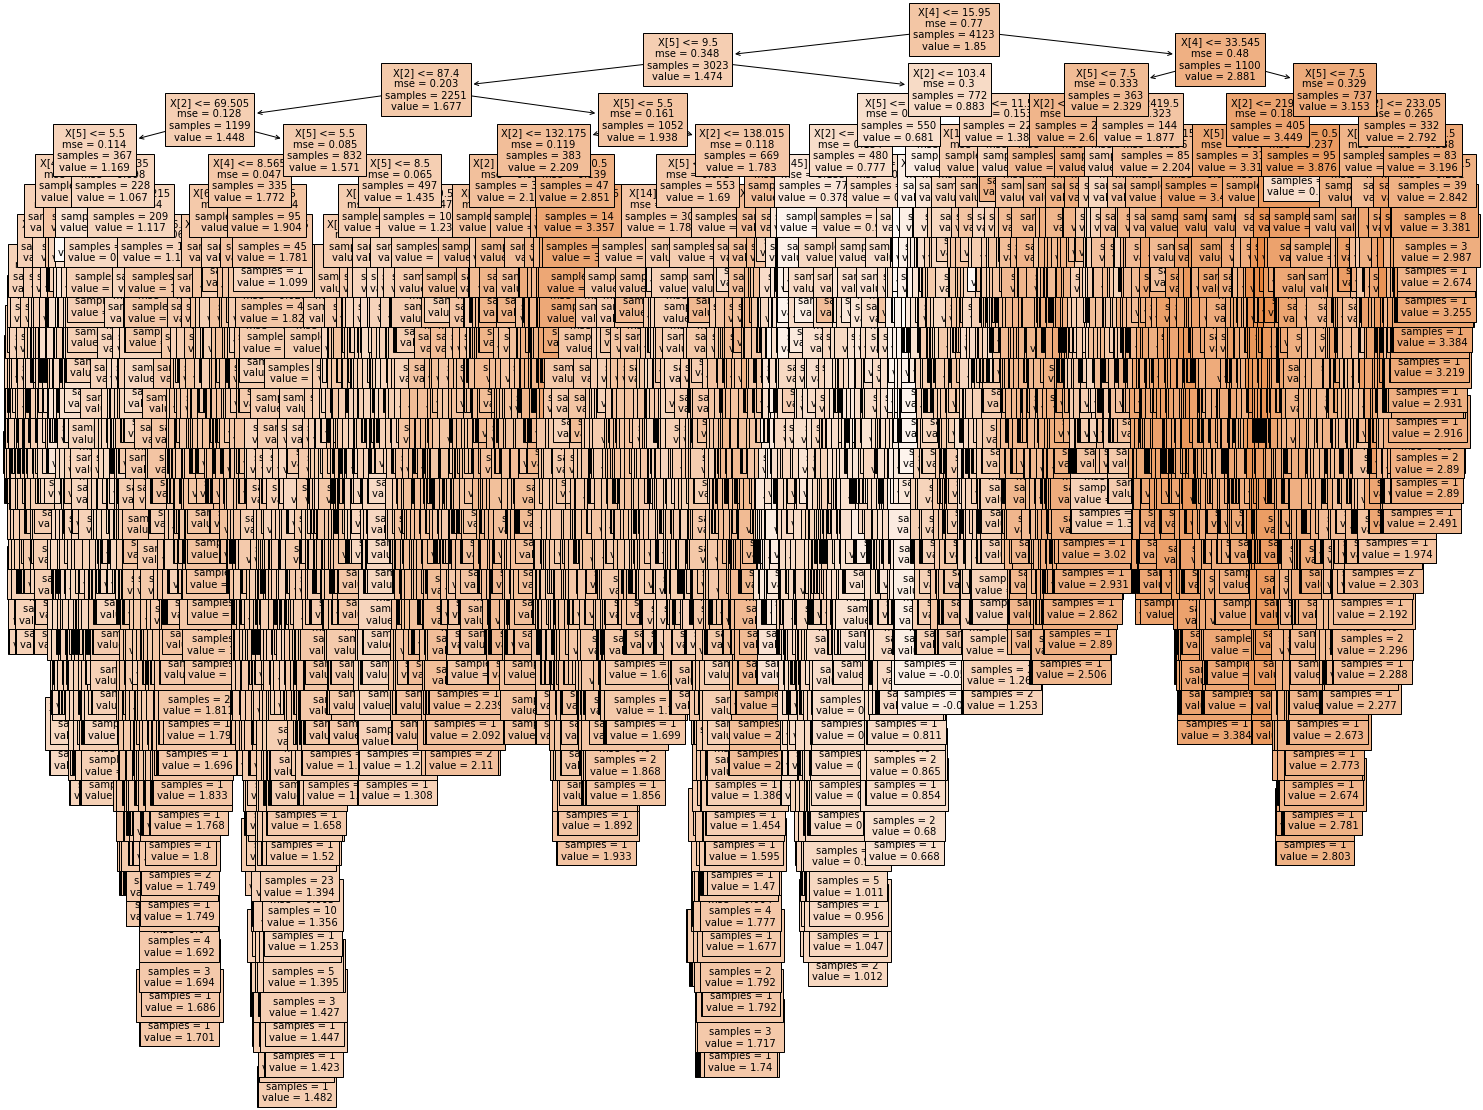

In [182]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(dtree, fontsize=10,filled= True)


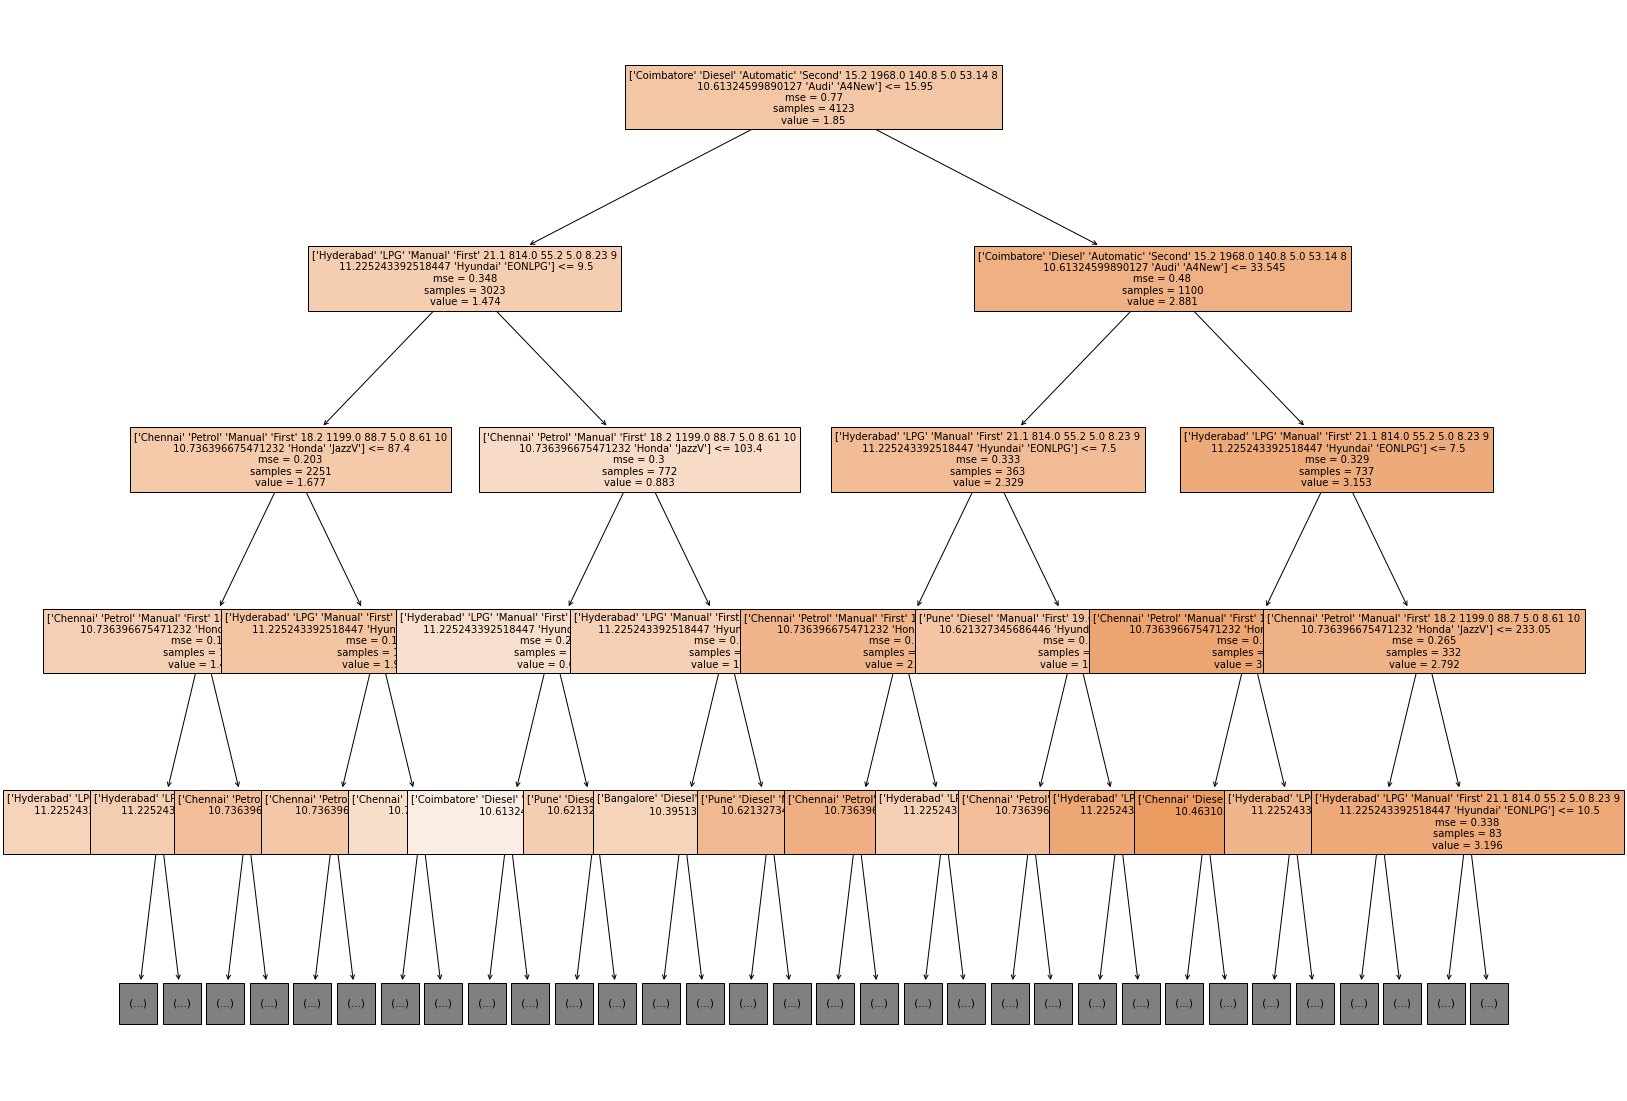

In [183]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=features, fontsize=10,filled= True,max_depth=4)

#### **Observations and insights: _____**
- The most important features are New_Price, Year, Power, Age of The Car, and Engine. Out of these, age of the car and Year are the same, therefore we should drop one of them.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [184]:
# import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [185]:
# Create a Randomforest regression model 
regressor = RandomForestRegressor(n_estimators=20, random_state=1)

In [186]:
# Fit Randomforest regression model.
regressor.fit(X_train, y_train["Price"])
y_pred1 = regressor.predict(X_test)

In [187]:
get_model_score(regressor)

R-sqaure on training set :  -1.7900942705385982e+110
R-square on test set :  -1.0712496765883332e+60
RMSE on training set :  1.5327547796113513e+56
RMSE on test set :  1.0757958028200343e+31


[-1.7900942705385982e+110,
 -1.0712496765883332e+60,
 1.5327547796113513e+56,
 1.0757958028200343e+31]

In [218]:
regressor2 = RandomForestRegressor(n_estimators=20, random_state=1)
regressor2.fit(X_train, y_train["price_log"])
y_pred2 = regressor2.predict(X_test)
get_model_score(regressor2)

R-sqaure on training set :  0.982457792705136
R-square on test set :  0.9392629619213073
RMSE on training set :  1.5173188289113637
RMSE on test set :  2.561599903620747


[0.982457792705136, 0.9392629619213073, 1.5173188289113637, 2.561599903620747]

In [189]:
# Now we can increase the number of trees from 20 to 100:
regressor3 = RandomForestRegressor(n_estimators=100, random_state=1)
regressor3.fit(X_train, y_train["price_log"])
y_pred3 = regressor3.predict(X_test)
get_model_score(regressor3)

R-sqaure on training set :  0.9858952755127414
R-square on test set :  0.9426611077530415
RMSE on training set :  1.360557909684566
RMSE on test set :  2.4889097147133743


[0.9858952755127414, 0.9426611077530415, 1.360557909684566, 2.4889097147133743]

In [190]:
# Now we can increase the number of trees from 20 to 200:
regressor4 = RandomForestRegressor(n_estimators=200, random_state=1)
regressor4.fit(X_train, y_train["price_log"])
y_pred4 = regressor4.predict(X_test)
get_model_score(regressor4)

R-sqaure on training set :  0.9841611846509982
R-square on test set :  0.9422919556346615
RMSE on training set :  1.4417703024225168
RMSE on test set :  2.4969087551121927


[0.9841611846509982,
 0.9422919556346615,
 1.4417703024225168,
 2.4969087551121927]

In [219]:
print(regressor4.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


#### **Observations and insights: _____**
- RMSE is almost the same or changes slightly between 1.91, 1.83, 1.85 for 20, 100, and 100 trees.
- MAE stays more or less the same and and MSE also changes very slightly.

In [191]:
X_train.shape

(4123, 711)

**Feature Importance**

In [192]:
# Print important features similar to decision trees
Ximp = cars_data.drop(['Name','Price','price_log','Kilometers_Driven','Year'],axis=1)
yimp = cars_data[["price_log"]]
Ximp = pd.get_dummies(X,drop_first=True)
Ximp_train, Ximp_test, yimp_train, yimp_test = train_test_split(Ximp, yimp, test_size=0.3, random_state=1)
Ximp_train.head()
dtree.feature_importances_

print (pd.DataFrame(regressor4.feature_importances_, columns = ["Imp"], index = Ximp_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.550715
Ageofcar               0.215178
Power                  0.142827
Engine                 0.019481
kilometers_driven_log  0.012162
...                         ...
Model_EtiosV           0.000000
Model_EecoSmiles       0.000000
Model_EecoCNG          0.000000
Model_EONLPG           0.000000
Model_RediGO           0.000000

[711 rows x 1 columns]


In [193]:
pd.DataFrame(regressor4.feature_importances_, columns = ["Imp"], index = Ximp_train.columns).sort_values(by = 'Imp', ascending = False).head(10)

Imp
New_price              0.550715
Ageofcar               0.215178
Power                  0.142827
Engine                 0.019481
kilometers_driven_log  0.012162
Mileage                0.007457
Location_Kolkata       0.004088
Brand_Tata             0.003789
Model_CayenneBase      0.003348
Location_Hyderabad     0.003098

In [194]:
#Important features for regression model in decision tree model:
print('Top 10 important features for regression model in decision tree model:\n')

pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = Ximp_train.columns).head(10)

Top 10 important features for regression model in decision tree model:



Imp
Mileage                0.005725
Engine                 0.014571
Power                  0.132921
Seats                  0.000616
New_price              0.566412
Ageofcar               0.217676
kilometers_driven_log  0.012568
Location_Bangalore     0.001987
Location_Chennai       0.001307
Location_Coimbatore    0.002369

In [195]:

print (pd.DataFrame(regressor3.feature_importances_, columns = ["Imp"], index = Ximp_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.548974
Ageofcar               0.214419
Power                  0.143830
Engine                 0.020434
kilometers_driven_log  0.012264
...                         ...
Model_Getz1.3          0.000000
Model_GOT              0.000000
Model_GOPlus           0.000000
Model_Fluence2.0       0.000000
Model_SantroLP         0.000000

[711 rows x 1 columns]


In [196]:
#Important feature for regressor model in Random Forest:
print('Top 10 important features for regressor model in Random Forest:\n')
pd.DataFrame(regressor3.feature_importances_, columns = ["Imp"], index = Ximp_train.columns).head(10)

Top 10 important features for regressor model in Random Forest:



Imp
Mileage                0.007391
Engine                 0.020434
Power                  0.143830
Seats                  0.002545
New_price              0.548974
Ageofcar               0.214419
kilometers_driven_log  0.012264
Location_Bangalore     0.001279
Location_Chennai       0.000840
Location_Coimbatore    0.001753

#### **Observations and insights: _____**

- Random Forest and Decision Tree had slightly different top 10 features. But it was in general more or less the same.
-  The top 10 more important features are New Price, Age of Car, Engine, Power, Seats, km Driven, and some locations which changes if we use one Random forest model or another RF model or the decision tree.

### **Hyperparameter Tuning: Decision Tree**

In [197]:
y.head()

price_log  Price
0   0.559616   1.75
1   2.525729  12.50
2   1.504077   4.50
3   1.791759   6.00
4   2.875822  17.74

In [198]:
print(X_train.shape)
print(y_train.shape)

(4123, 711)
(4123, 2)


In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Choose the type of estimator. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from.
# Check documentation for all the parametrs that the model takes and play with those.
parameters={"splitter":["best","random"],
            "max_depth" : [1,5,10],
           "min_samples_leaf":[1,2,5,10],
           "min_weight_fraction_leaf":[0.1,0.5,0.8,0.9],
           "max_features":[None, 2, 3 , 5 , 10],
           "max_leaf_nodes":[None,10,20,30,80] }

dtree_tuned.fit(X_train,y_train['price_log'])

# Type of scoring used to compare parameter combinations
scorer = dtree_tuned.score(X_train,y_train['price_log'])


# Run the grid search
grid_obj = GridSearchCV(dtree_tuned,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
grid_obj = grid_obj.fit(X_train,y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_
grid_obj.best_estimator_

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.388 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.374 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.390 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.406 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.415 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.430 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=N

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=N

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.388 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.374 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.390 total time=   0.0s
[CV 1/3] END max_depth=1, ma

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.430 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=N

[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, ma

[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_feature

[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=1

[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=1

[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2

[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_feat

[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=3

[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2

[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=2, max_

[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_

[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, 

[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3

[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_lea

[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=2

[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_

[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_

[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=8

[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=3, 

[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, ma

[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, ma

[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=1

[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_n

[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5

[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_

[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=3

[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_

[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_feature

[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_feat

[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_feat

[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max

[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=1

[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_feat

[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_feature

[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=10, max_leaf_

[CV 2/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.206 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.331 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.331 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.331 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.352 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, ma

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=N

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.206 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.338 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.314 total time=   0.0s
[CV 3/3] END max_depth=5,

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.206 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.338 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.314 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.343 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.343 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=N

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_feat

[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_f

[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2

[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_n

[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=2

[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_feat

[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2

[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_

[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=8

[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, ma

[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, ma

[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3

[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_n

[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=2

[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nod

[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, m

[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_feat

[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, m

[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=3, max_leaf_n

[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_

[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5

[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.491 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5

[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_n

[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=2

[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_

[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_feat

[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=8

[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10,

[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5,

[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_feat

[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, 

[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_

[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_

[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=1

[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=5, ma

[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_

[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=10, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=10, max

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 2/3] END max_de

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.206 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.338 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.314 total time=   0.0s
[CV 3/3] END max

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.338 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.314 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.343 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_de

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_

[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_fea

[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.206 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.215 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.206 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.338 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.314 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.343 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.314 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.343 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.531 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_fea

[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_fea

[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_

[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_fea

[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_fea

[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_le

[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_

[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, 

[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, m

[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_

[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max

[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_fea

[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_fea

[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_le

[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_

[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=3, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=3, max_l

[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.491 total time=   0.0s
[CV 3/3] END max_depth=10

[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.491 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_fea

[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max

[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_

[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.491 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_fea

[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.491 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_fea

[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_le

[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=5, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=5, max_leaf_

[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, m

[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END m

[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.754 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, m

[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, m

[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10,

[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=

[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10,

[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.766 total time=   0.0s
[CV 2/3] END max_depth=10, max_f

[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.761 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.770 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.777 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=10, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.766 total time=   0.0s
[CV 3/3] END max_depth=10, m

DecisionTreeRegressor(max_depth=5, min_weight_fraction_leaf=0.1, random_state=1)

In [205]:

# Fit the best algorithm to the data. 
print(dtree_tuned.fit(X_train,y_train['price_log']))
print('----------------------------------------------------------\n')


print('grid_search.best_params_ are: \n' ,grid_obj.best_params_)
print('----------------------------------------------------------\n')

print('Best Score of grid_obj is: \n', grid_obj.best_score_)
print('----------------------------------------------------------\n')


DecisionTreeRegressor(max_depth=5, min_weight_fraction_leaf=0.1, random_state=1)
----------------------------------------------------------

grid_search.best_params_ are: 
 {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
----------------------------------------------------------

Best Score of grid_obj is: 
 -0.21198789899487944
----------------------------------------------------------



[Text(739.7727272727273, 1019.25, 'Mileage <= 16.0\nmse = 0.8\nsamples = 4123\nvalue = 1.8'),
 Text(528.409090909091, 792.75, 'Engine <= 9.5\nmse = 0.3\nsamples = 3023\nvalue = 1.5'),
 Text(422.72727272727275, 566.25, 'Transmission <= 87.4\nmse = 0.2\nsamples = 2251\nvalue = 1.7'),
 Text(211.36363636363637, 339.75, 'Transmission <= 73.4\nmse = 0.1\nsamples = 1199\nvalue = 1.4'),
 Text(105.68181818181819, 113.25, 'mse = 0.1\nsamples = 430\nvalue = 1.2'),
 Text(317.04545454545456, 113.25, 'mse = 0.1\nsamples = 769\nvalue = 1.6'),
 Text(634.0909090909091, 339.75, 'Engine <= 6.5\nmse = 0.2\nsamples = 1052\nvalue = 1.9'),
 Text(528.409090909091, 113.25, 'mse = 0.1\nsamples = 554\nvalue = 2.1'),
 Text(739.7727272727273, 113.25, 'mse = 0.1\nsamples = 498\nvalue = 1.7'),
 Text(634.0909090909091, 566.25, 'mse = 0.3\nsamples = 772\nvalue = 0.9'),
 Text(951.1363636363637, 792.75, 'Mileage <= 42.0\nmse = 0.5\nsamples = 1100\nvalue = 2.9'),
 Text(845.4545454545455, 566.25, 'mse = 0.4\nsamples = 417

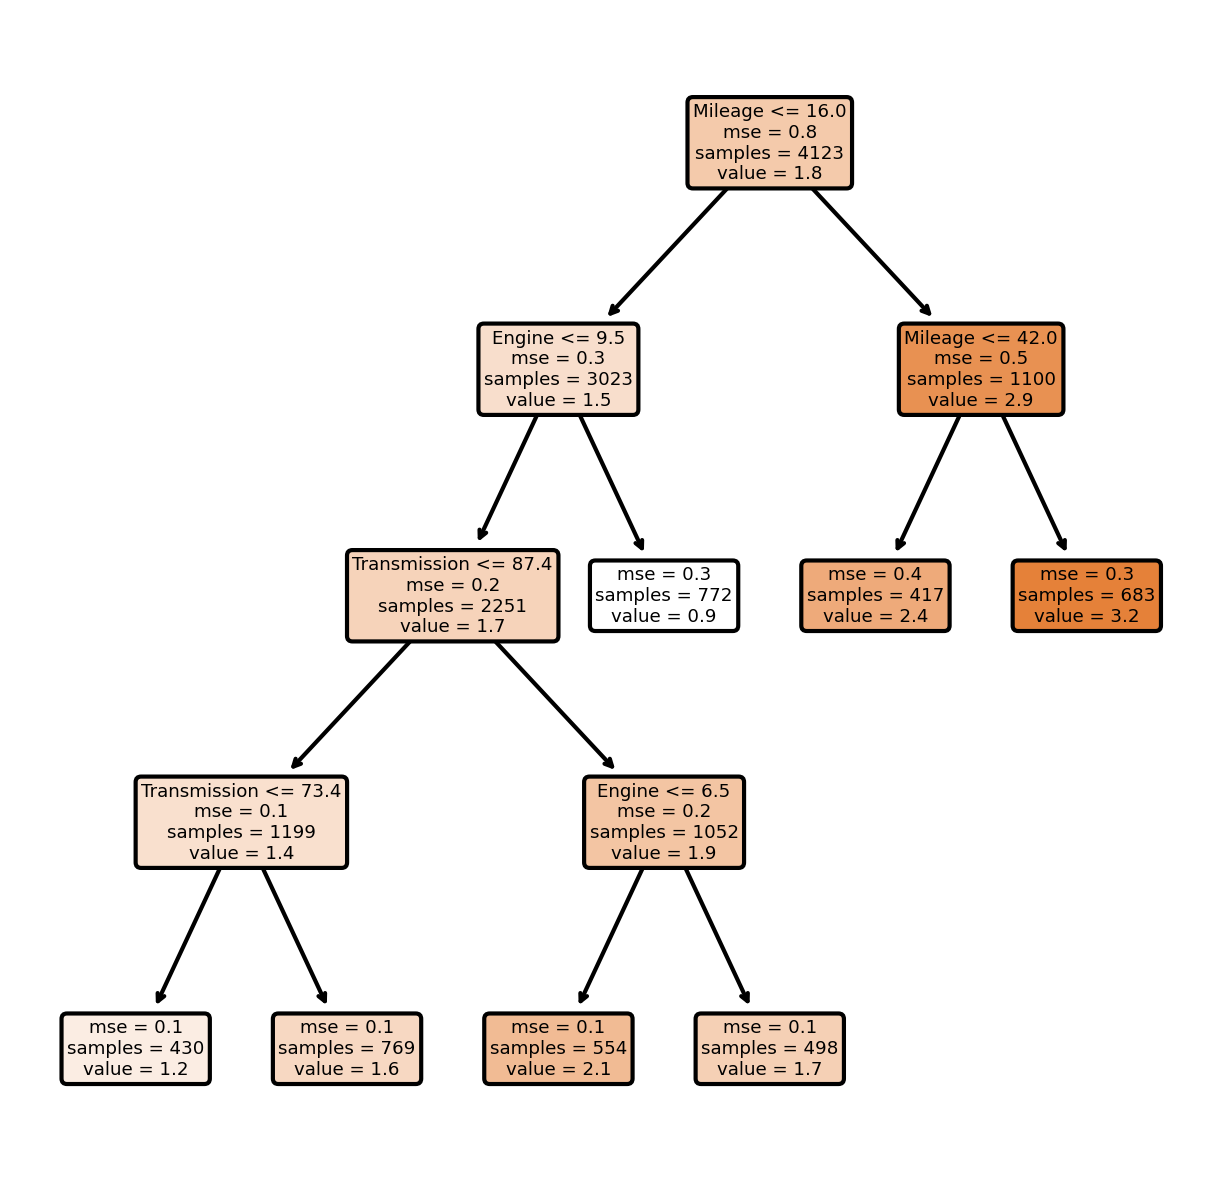

In [206]:
from matplotlib import pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(grid_obj.best_estimator_, feature_names=feature_list, rounded = True, precision = 1, proportion = False, filled= True)


In [207]:
dtree_tuned.score(X_train,y_train['price_log'])

0.7290041909885263

In [208]:
get_model_score(dtree_tuned)

R-sqaure on training set :  0.54458354840844
R-square on test set :  0.595982233768422
RMSE on training set :  7.73106073992391
RMSE on test set :  6.606702108633204


[0.54458354840844, 0.595982233768422, 7.73106073992391, 6.606702108633204]

In [209]:
get_model_score(grid_obj)

R-sqaure on training set :  0.54458354840844
R-square on test set :  0.595982233768422
RMSE on training set :  7.73106073992391
RMSE on test set :  6.606702108633204


[0.54458354840844, 0.595982233768422, 7.73106073992391, 6.606702108633204]

#### **Observations and insights: _____**
- Hyper Parameter Tuning did not really help with the decision tree model.

**Feature Importance**

In [210]:
# Print important features of tuned decision tree similar to decision trees
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
New_price                0.751867
Ageofcar                 0.173197
Power                    0.074936
Mileage                  0.000000
Model_RS5Coupe           0.000000
...                           ...
Model_EcosportSignature  0.000000
Model_Eeco5              0.000000
Model_Eeco7              0.000000
Model_EecoCNG            0.000000
Model_redi-GOT           0.000000

[711 rows x 1 columns]


In [211]:
(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)).head(10)

Imp
New_price          0.751867
Ageofcar           0.173197
Power              0.074936
Mileage            0.000000
Model_RS5Coupe     0.000000
Model_Q745         0.000000
Model_QualisFS     0.000000
Model_QualisFleet  0.000000
Model_QualisRS     0.000000
Model_QuantoC2     0.000000

#### **Observations and insights: _____**

- Top 3 important features are New_Price, Age of Car, and Power

### **Hyperparameter Tuning: Random Forest**

In [233]:
# Choose the type of Regressor. 
regressor_tuned = RandomForestRegressor(random_state=1)
regressor_tuned.fit(X_train, y_train["price_log"])

y_pred2 = regressor_tuned.predict(X_test)

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['auto', 10,20],
    'min_impurity_decrease': [0.0,0.5,2],
    'min_samples_leaf': [1, 3, 5, 10],
    'min_samples_split': [1 ,2,3, 5],
    'oob_score': [False],
    'n_estimators': [200,1000,1500,2000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = regressor_tuned, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

# Type of scoring used to compare parameter combinations
scorer = regressor_tuned.score(X_train,y_train['price_log'])


# Run the grid search

# Set the clf to the best combination of parameters
regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
result = grid_search.fit(X_train, y_train['price_log'])



print('grid_search.best_params_ are: \n' ,grid_search.best_params_)

print('Best Score is: \n', grid_search.best_score_)

print('result parameters: \n',result.get_params())
print('\nresult parameters: \n',regressor_tuned.get_params())


grid_search.best_params_ are: 
 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000, 'oob_score': False}
Best Score is: 
 0.939791597179919
result parameters: 
 {'cv': 3, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(random_state=1), 'n_jobs': -1, 'param_grid': {'bootstrap': [True], 'max_d

In [234]:
print(result.get_params())

{'cv': 3, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(random_state=1), 'n_jobs': -1, 'param_grid': {'bootstrap': [True], 'max_depth': [None], 'max_features': ['auto', 10, 20], 'min_impurity_decrease': [0.0, 0.5, 2], 'min_samples_leaf': [1, 3, 5, 10], 'min_samples_split': [1, 2, 3, 5], 'oob_score': [False], 'n_estimators': [200, 1000, 1500, 2000]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'ret

In [236]:
get_model_score(result)

R-sqaure on training set :  0.9864275271570241
R-square on test set :  0.9428710317871813
RMSE on training set :  1.3346402510281832
RMSE on test set :  2.4843494499356273


[0.9864275271570241,
 0.9428710317871813,
 1.3346402510281832,
 2.4843494499356273]

In [235]:
from sklearn.ensemble import RandomForestRegressor
regressor_tuned_best = RandomForestRegressor(random_state=1,bootstrap= True, max_depth= None, max_features='auto', min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000, oob_score= False)
regressor_tuned_best.fit(X_train, y_train["price_log"])
get_model_score(regressor_tuned_best)

KeyboardInterrupt: 

In [230]:
get_model_score(regressor_tuned_best)

R-sqaure on training set :  0.9859997969931026
R-square on test set :  0.9432464767557691
RMSE on training set :  1.3555074047671611
RMSE on test set :  2.4761725648468595


[0.9859997969931026,
 0.9432464767557691,
 1.3555074047671611,
 2.4761725648468595]

[Text(739.7727272727273, 1019.25, 'Mileage <= 16.0\nmse = 0.8\nsamples = 4123\nvalue = 1.8'),
 Text(528.409090909091, 792.75, 'Engine <= 9.5\nmse = 0.3\nsamples = 3023\nvalue = 1.5'),
 Text(422.72727272727275, 566.25, 'Transmission <= 87.4\nmse = 0.2\nsamples = 2251\nvalue = 1.7'),
 Text(211.36363636363637, 339.75, 'Transmission <= 73.4\nmse = 0.1\nsamples = 1199\nvalue = 1.4'),
 Text(105.68181818181819, 113.25, 'mse = 0.1\nsamples = 430\nvalue = 1.2'),
 Text(317.04545454545456, 113.25, 'mse = 0.1\nsamples = 769\nvalue = 1.6'),
 Text(634.0909090909091, 339.75, 'Engine <= 6.5\nmse = 0.2\nsamples = 1052\nvalue = 1.9'),
 Text(528.409090909091, 113.25, 'mse = 0.1\nsamples = 554\nvalue = 2.1'),
 Text(739.7727272727273, 113.25, 'mse = 0.1\nsamples = 498\nvalue = 1.7'),
 Text(634.0909090909091, 566.25, 'mse = 0.3\nsamples = 772\nvalue = 0.9'),
 Text(951.1363636363637, 792.75, 'Mileage <= 42.0\nmse = 0.5\nsamples = 1100\nvalue = 2.9'),
 Text(845.4545454545455, 566.25, 'mse = 0.4\nsamples = 417

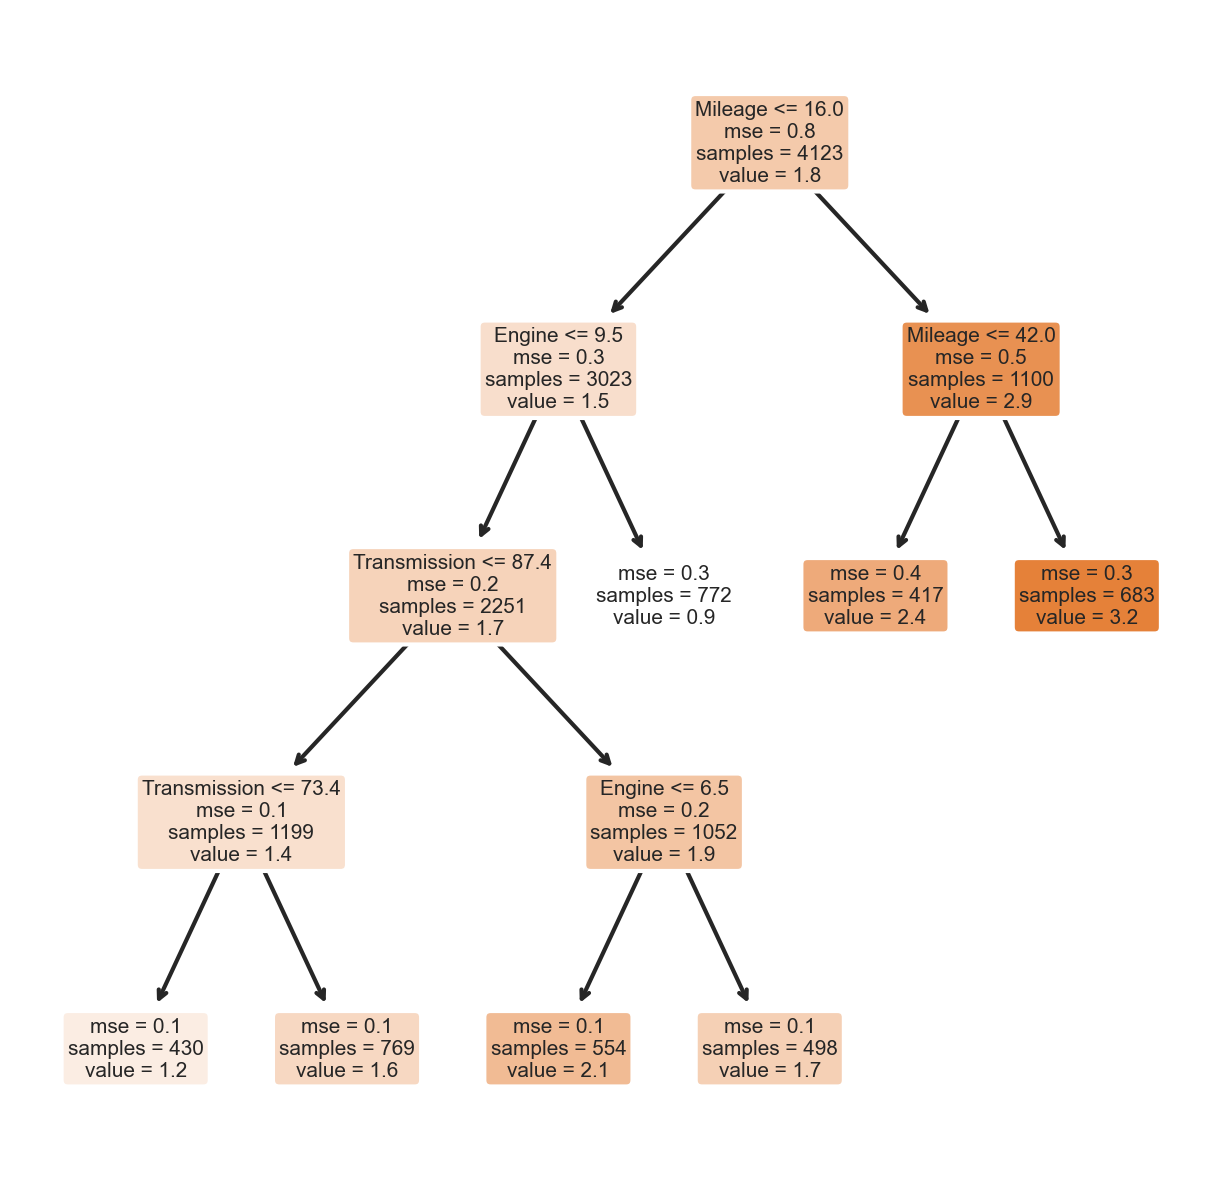

In [668]:
from matplotlib import pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(grid_obj.best_estimator_, feature_names=feature_list, rounded = True, precision = 1, proportion = False, filled= True)


**Feature Importance**

In [669]:
# Print important features of tuned decision tree similar to decision trees
print (pd.DataFrame(regressor_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
New_price                0.751867
Ageofcar                 0.173197
Power                    0.074936
Mileage                  0.000000
Model_RS5Coupe           0.000000
...                           ...
Model_EcosportSignature  0.000000
Model_Eeco5              0.000000
Model_Eeco7              0.000000
Model_EecoCNG            0.000000
Model_redi-GOT           0.000000

[711 rows x 1 columns]


In [670]:
pd.DataFrame(regressor_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10)

Imp
New_price          0.751867
Ageofcar           0.173197
Power              0.074936
Mileage            0.000000
Model_RS5Coupe     0.000000
Model_Q745         0.000000
Model_QualisFS     0.000000
Model_QualisFleet  0.000000
Model_QualisRS     0.000000
Model_QuantoC2     0.000000

#### **Observations and insights: ______**

- According to this model, the most important features are New_Price, Age Of Car, Power, and Mileage.

In [673]:
# defining list of models you have trained
models = [lr,ridge, lasso,dtree, dtree_tuned, regressor4,result]
# defining empty lists to add train and test results
#olsmodel, dtree_tune
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [674]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Lasso','Decision Tree','Decision Tree Tuned','Random Forest','Random Forest Tuned'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

Model   Train_r2   Test_r2  Train_RMSE  Test_RMSE
0    Linear Regression   0.960470  0.932824    2.277712   2.693953
1                Ridge   0.950409  0.929912    2.551163   2.751739
2                Lasso -23.353397  0.390370   56.534623   8.115543
3        Decision Tree   1.000000  0.876129    0.005282   3.658212
4  Decision Tree Tuned   0.544584  0.595982    7.731061   6.606702
5        Random Forest   0.984161  0.942292    1.441770   2.496909
6  Random Forest Tuned   0.966501  0.895097    2.096778   3.366499

#### **Observations: _____**
- Based on above table, Random Forest has had the highest R2 considering both Train and Test dataset/ Although decision tree had a very high (1) R2 on training dataset, but because it did not perform well on test, it means it was overfitting.

**Note:** You can also try some other algorithms such as kNN and compare the model performance with the existing ones

In [676]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    KNN_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN_model.fit(X_train, y_train['price_log'])  #fit the model
    KNN_pred=KNN_model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test['price_log'], KNN_pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    print('-----------\n')
    print('score for this k is',get_model_score(KNN_model))


RMSE value for k=  1 is: 0.25794799903540777
-----------

R-sqaure on training set :  0.9999995749450818
R-square on test set :  0.8634684130072899
RMSE on training set :  0.007468910419026427
RMSE on test set :  3.8406175561580826
score for this k is [0.9999995749450818, 0.8634684130072899, 0.007468910419026427, 3.8406175561580826]
RMSE value for k=  2 is: 0.23010969065571607
-----------

R-sqaure on training set :  0.9532901323465237
R-square on test set :  0.8772311169801663
RMSE on training set :  2.475933900217027
RMSE on test set :  3.6419052767528335
score for this k is [0.9532901323465237, 0.8772311169801663, 2.475933900217027, 3.6419052767528335]
RMSE value for k=  3 is: 0.23192766526821795
-----------

R-sqaure on training set :  0.912915362978905
R-square on test set :  0.8775932237500778
RMSE on training set :  3.3806911817633045
RMSE on test set :  3.636530411478324
score for this k is [0.912915362978905, 0.8775932237500778, 3.3806911817633045, 3.636530411478324]
RMSE valu

In [677]:
KNN_model2 = neighbors.KNeighborsRegressor(n_neighbors = 4)
KNN_model2.fit(X_train, y_train['price_log'])  #fit the model
KNN_pred=KNN_model2.predict(X_test) #make prediction on test set
get_model_score(KNN_model2)


R-sqaure on training set :  0.8788660518648725
R-square on test set :  0.8785248249592699
RMSE on training set :  3.9871967260069883
RMSE on test set :  3.622665710710129


[0.8788660518648725, 0.8785248249592699, 3.9871967260069883, 3.622665710710129]

### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?